Yedupati Venkata Yamini - Forecasting Project code notebook

In [180]:
#import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#time series related libraries
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [181]:
#1. Read the data as an appropriate Time Series data and plot the data.

In [182]:
Rose_data_original = pd.read_csv('Rose.csv')

In [183]:

Rose_data_original.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [184]:
Rose_data_original.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [185]:
Rose_data = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'])

In [186]:
Rose_data.head()

YearMonth   Rose
0 1980-01-01  112.0
1 1980-02-01  118.0
2 1980-03-01  129.0
3 1980-04-01   99.0
4 1980-05-01  116.0

In [187]:
Rose_data.tail()

YearMonth  Rose
182 1995-03-01  45.0
183 1995-04-01  52.0
184 1995-05-01  28.0
185 1995-06-01  40.0
186 1995-07-01  62.0

In [188]:
Rose_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    datetime64[ns]
 1   Rose       185 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [189]:
date = pd.date_range(start='1/1/1980', end='7/1/1995', freq='MS')
date

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', length=187, freq='MS')

In [190]:
Rose_data['Year'] = date.year
Rose_data['Month'] = date.month

In [191]:
import calendar
Rose_data['Month'] = Rose_data['Month'].apply(lambda x : calendar.month_abbr[x])

In [192]:
Rose_data.head()

YearMonth   Rose  Year Month
0 1980-01-01  112.0  1980   Jan
1 1980-02-01  118.0  1980   Feb
2 1980-03-01  129.0  1980   Mar
3 1980-04-01   99.0  1980   Apr
4 1980-05-01  116.0  1980   May

In [193]:
Rose_data.set_index('YearMonth', drop = True, inplace = True)

In [194]:
Rose_data.head()

Rose  Year Month
YearMonth                    
1980-01-01  112.0  1980   Jan
1980-02-01  118.0  1980   Feb
1980-03-01  129.0  1980   Mar
1980-04-01   99.0  1980   Apr
1980-05-01  116.0  1980   May

In [195]:
Rose_data.tail()

Rose  Year Month
YearMonth                   
1995-03-01  45.0  1995   Mar
1995-04-01  52.0  1995   Apr
1995-05-01  28.0  1995   May
1995-06-01  40.0  1995   Jun
1995-07-01  62.0  1995   Jul

In [196]:
Rose_data.shape

(187, 3)

In [197]:
Rose_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
 1   Year    187 non-null    int64  
 2   Month   187 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ KB


In [198]:
Rose_data['Rose'].describe()

count    185.000000
mean      90.394595
std       39.175344
min       28.000000
25%       63.000000
50%       86.000000
75%      112.000000
max      267.000000
Name: Rose, dtype: float64

In [199]:
Rose_data['Rose'].isnull().sum()

2

In [200]:
Rose_data[Rose_data['Rose'].isnull()]

Rose  Year Month
YearMonth                   
1994-07-01   NaN  1994   Jul
1994-08-01   NaN  1994   Aug

In [201]:
Rose_data.fillna(Rose_data.loc['1994-06-01']['Rose'], inplace = True)

In [202]:
Rose_data['Rose'].isnull().sum()

0

In [203]:
Rose_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
 1   Year    187 non-null    int64  
 2   Month   187 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.9+ KB


In [204]:
Rose_data['Rose'].describe()

count    187.000000
mean      89.909091
std       39.244440
min       28.000000
25%       62.500000
50%       85.000000
75%      111.000000
max      267.000000
Name: Rose, dtype: float64

Text(0.5, 1.0, 'Rose wine sales')

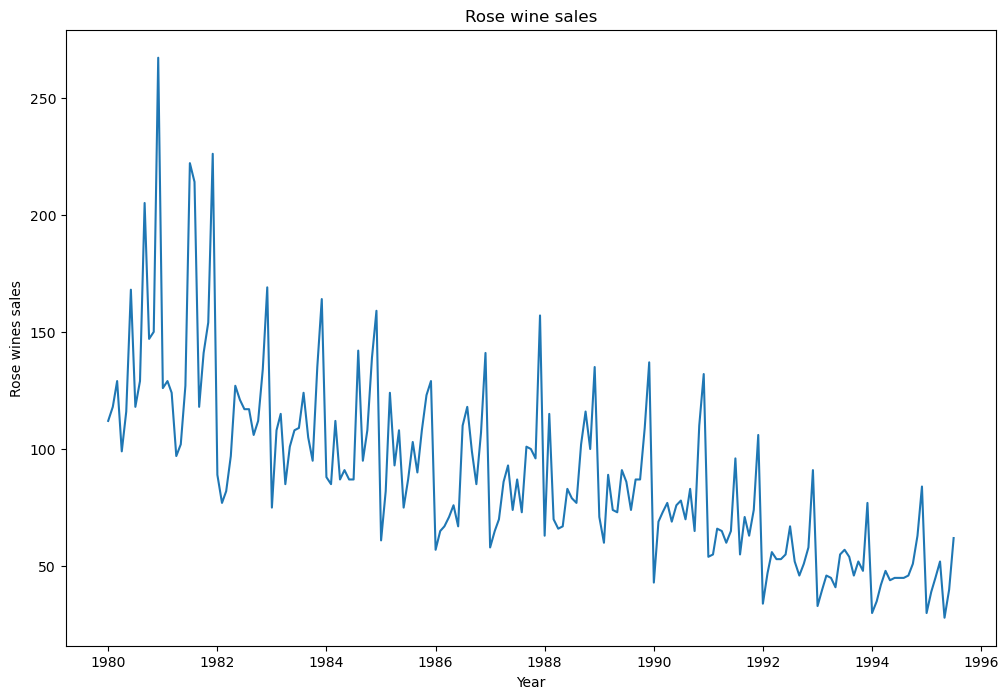

In [205]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
plt.plot(Rose_data['Rose'], data = Rose_data);
plt.xlabel('Year')
plt.ylabel('Rose wines sales')
plt.title('Rose wine sales')

In [206]:
#Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

Text(0.5, 1.0, 'Yearly sales of Rose wine')

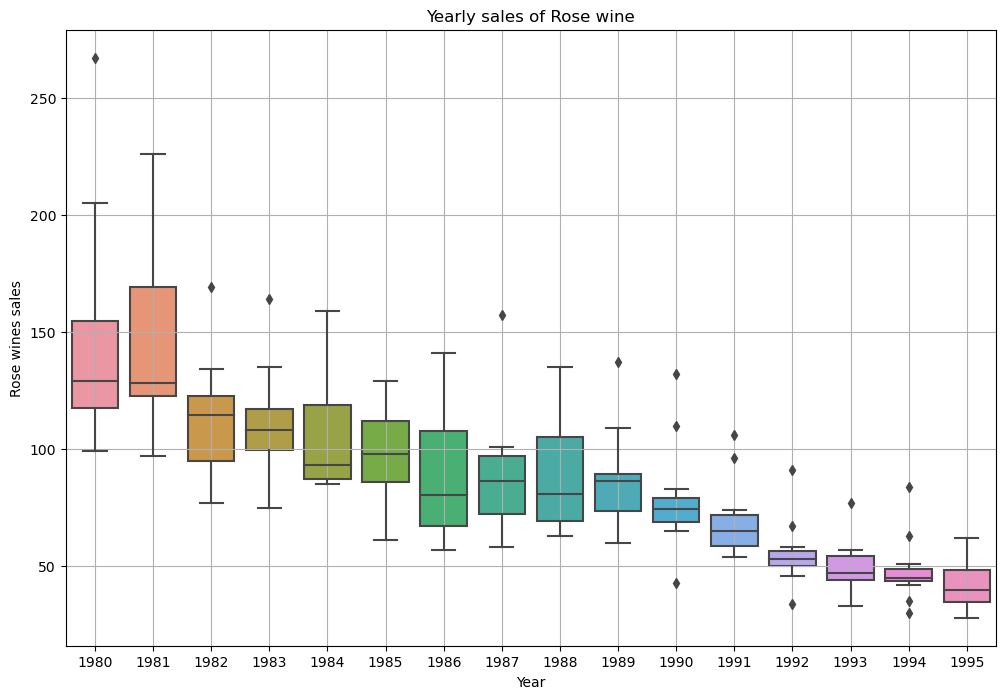

In [207]:
#Yearly sales of Rose wine data
sns.boxplot(x = Rose_data.index.year,y = Rose_data['Rose'])
plt.grid();
plt.xlabel('Year')
plt.ylabel('Rose wines sales')
plt.title('Yearly sales of Rose wine')

In [215]:
#Time series decomposition
additive_decomposition = sm.tsa.seasonal_decompose(Rose_data['Rose'], model = 'additive')

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\2466516512.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


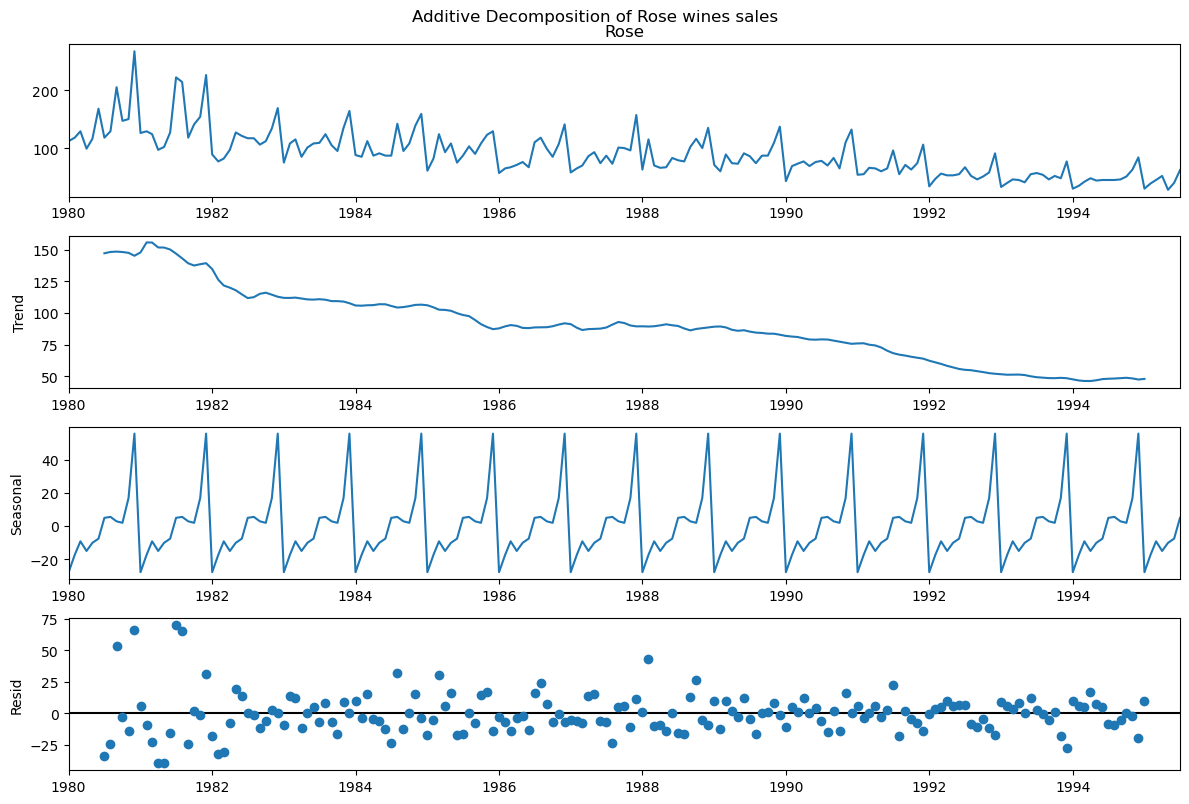

In [216]:
fig = additive_decomposition.plot()
fig.suptitle('Additive Decomposition of Rose wines sales', x = 0.5,y = 1)
fig.show()

In [217]:
multiplicative_decomposition = sm.tsa.seasonal_decompose(Rose_data['Rose'], model = 'multiplicative')

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3125486149.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


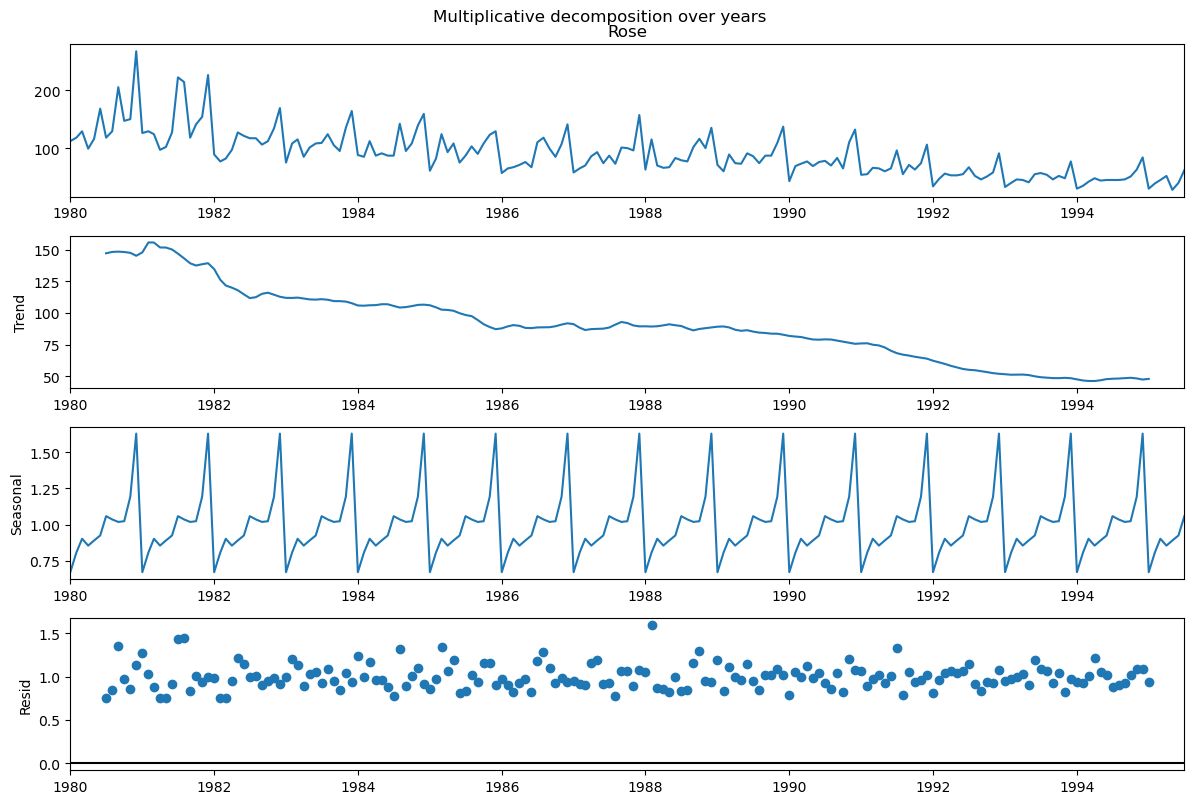

In [218]:
%matplotlib inline
fig = multiplicative_decomposition.plot()
fig.suptitle('Multiplicative decomposition over years', x = 0.5, y = 1)
fig.show()

In [219]:
#3. Split the data into training and test. The test data should start in 1991.

In [220]:
train = pd.DataFrame(Rose_data[Rose_data.index < '01-01-1991']['Rose'])
test = pd.DataFrame(Rose_data[Rose_data.index >= '01-01-1991']['Rose'])

In [221]:
train.shape

(132, 1)

In [222]:
test.shape

(55, 1)

In [223]:
print(train.head())
print(train.tail())

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
             Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0


In [224]:
print(test.head())
print(test.tail())

            Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0
            Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0


In [225]:
#!pip3 install statsmodels

#4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. 

Other models such as regression,naïve forecast models and simple average models. 

should also be built on the training data and check the performance on the test data using RMSE.

In [226]:
## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

#We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0  

In [227]:
#Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
LinearRegression_test

Rose  time  RegOnTime
YearMonth                         
1991-01-01   54.0   133  72.063266
1991-02-01   55.0   134  71.568888
1991-03-01   66.0   135  71.074511
1991-04-01   65.0   136  70.580133
1991-05-01   60.0   137  70.085755
1991-06-01   65.0   138  69.591377
1991-07-01   96.0   139  69.096999
1991-08-01   55.0   140  68.602621
1991-09-01   71.0   141  68.108243
1991-10-01   63.0   142  67.613866
1991-11-01   74.0   143  67.119488
1991-12-01  106.0   144  66.625110
1992-01-01   34.0   145  66.130732
1992-02-01   47.0   146  65.636354
1992-03-01   56.0   147  65.141976
1992-04-01   53.0   148  64.647598
1992-05-01   53.0   149  64.153220
1992-06-01   55.0   150  63.658843
1992-07-01   67.0   151  63.164465
1992-08-01   52.0   152  62.670087
1992-09-01   46.0   153  62.175709
1992-10-01   51.0   154  61.681331
1992-11-01   58.0   155  61.186953
1992-12-01   91.0   156  60.692575
1993-01-01   33.0   157  60.198198
1993-02-01   40.0   158  59.703820
1993-03-01   46.0   159  59.209442
1993-04-01   45.0   160  58.715064
1993-05-01   41.0   161  58.220686
1993-06-01   55.0   162  57.726308
1993-07-01   57.0   163  57.231930
1993-08-01   54.0   164  56.737553
1993-09-01   46.0   165  56.243175
1993-10-01   52.0   166  55.748797
1993-11-01   48.0   167  55.254419
1993-12-01   77.0   168  54.760041
1994-01-01   30.0   169  54.265663
1994-02-01   35.0   170  53.771285
1994-03-01   42.0   171  53.276908
1994-04-01   48.0   172  52.782530
1994-05-01   44.0   173  52.288152
1994-06-01   45.0   174  51.793774
1994-07-01   45.0   175  51.299396
1994-08-01   45.0   176  50.805018
1994-09-01   46.0   177  50.310640
1994-10-01   51.0   178  49.816263
1994-11-01   63.0   179  49.321885
1994-12-01   84.0   180  48.827507
1995-01-01   30.0   181  48.333129
1995-02-01   39.0   182  47.838751
1995-03-01   45.0   183  47.344373
1995-04-01   52.0   184  46.849995
1995-05-01   28.0   185  46.355618
1995-06-01   40.0   186  45.861240
1995-07-01   62.0   187  45.366862

In [228]:
lr.intercept_

137.81552162849874

In [229]:
lr.coef_

array([-0.49437786])

Text(0.5, 1.0, 'Time series data with forecasts')

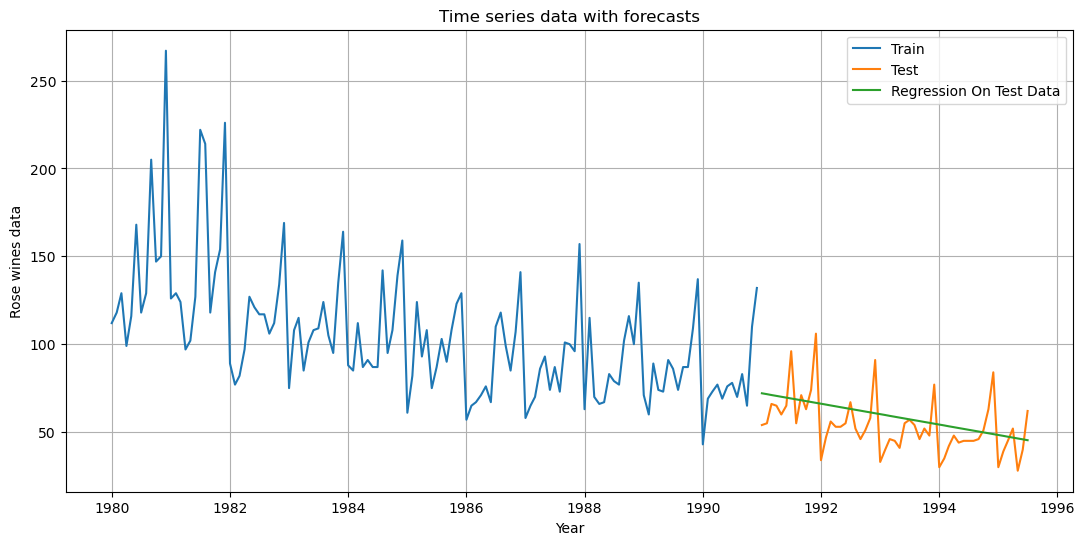

In [230]:
plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')
plt.legend(loc='best')
plt.grid();
plt.xlabel('Year')
plt.ylabel('Rose wines data')
plt.title('Time series data with forecasts')

In [231]:
#### Defining the accuracy metrics.

from sklearn import metrics

### Model Evaluation

## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 15.28


Test RMSE
RegressionOnTime  15.275732

In [232]:
## Method 2: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

MovingAverage = pd.DataFrame(Rose_data['Rose']).copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [233]:
#### Trailing moving averages


MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

In [234]:
MovingAverage.tail()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                       
1995-03-01  45.0        42.0       49.50   52.000000   49.777778
1995-04-01  52.0        48.5       41.50   52.166667   50.555556
1995-05-01  28.0        40.0       41.00   46.333333   48.666667
1995-06-01  40.0        34.0       41.25   39.000000   48.000000
1995-07-01  62.0        51.0       45.50   44.333333   49.222222

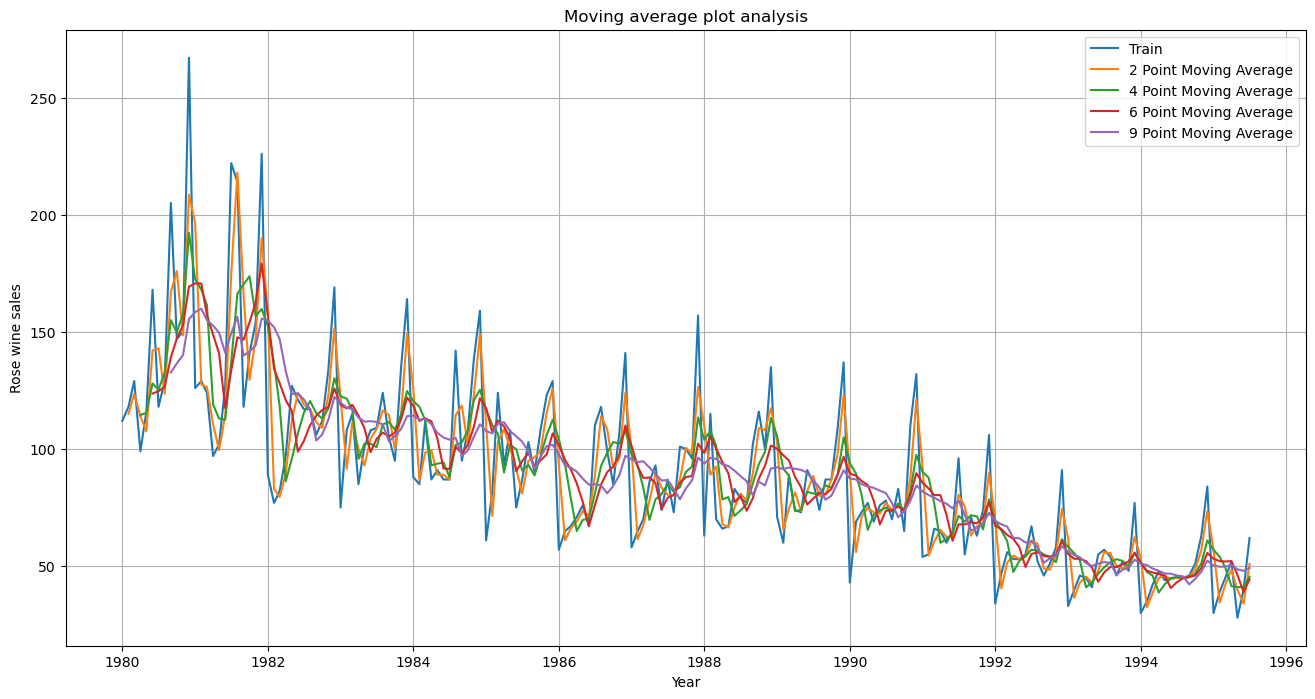

In [235]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('Rose wine sales')
plt.title('Moving average plot analysis')
plt.grid();

In [236]:
#Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

#Creating train and test set 
trailing_MovingAverage_train = pd.DataFrame(MovingAverage[MovingAverage.index < '01-01-1991'])
trailing_MovingAverage_test = pd.DataFrame(MovingAverage[MovingAverage.index >= '01-01-1991'])

print(trailing_MovingAverage_train)
print(trailing_MovingAverage_test)

             Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0      114.50         NaN         NaN
1980-05-01  116.0       107.5      115.50         NaN         NaN
...           ...         ...         ...         ...         ...
1990-08-01   70.0        74.0       73.25   73.833333   76.888889
1990-09-01   83.0        76.5       76.75   75.500000   70.888889
1990-10-01   65.0        74.0       74.00   73.500000   73.333333
1990-11-01  110.0        87.5       82.00   80.333333   77.888889
1990-12-01  132.0       121.0       97.50   89.666667   84.444444

[132 rows x 5 columns]
             Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                           

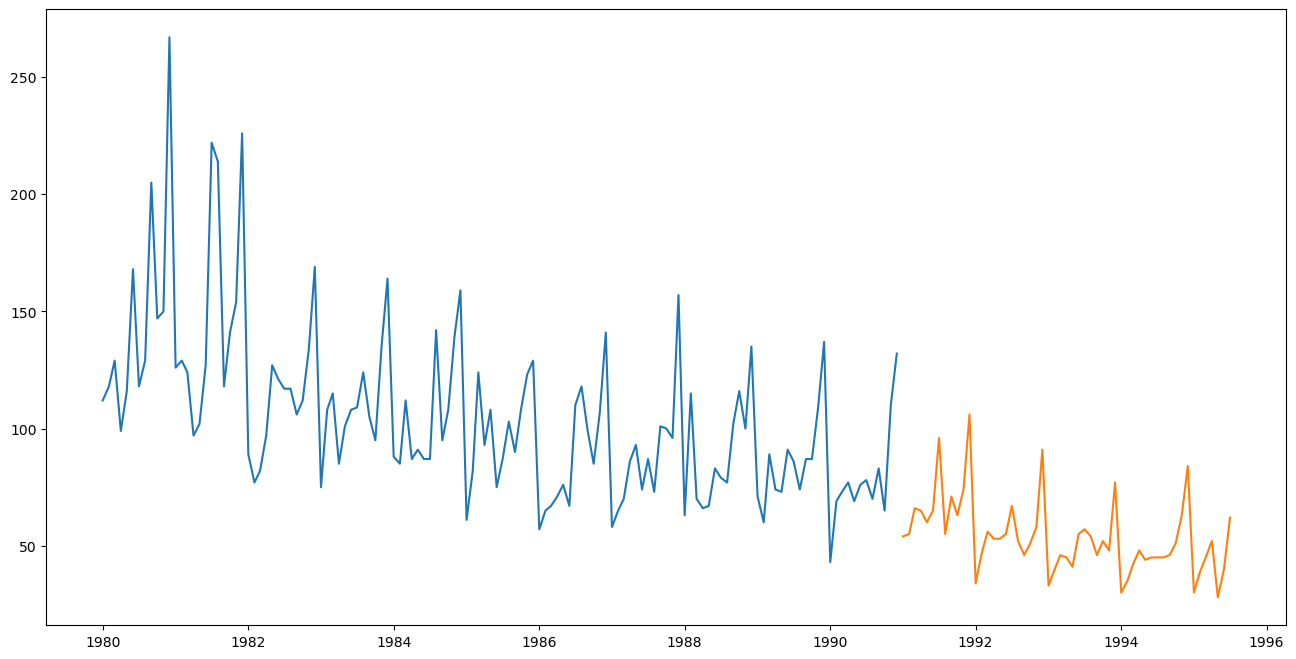

In [237]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

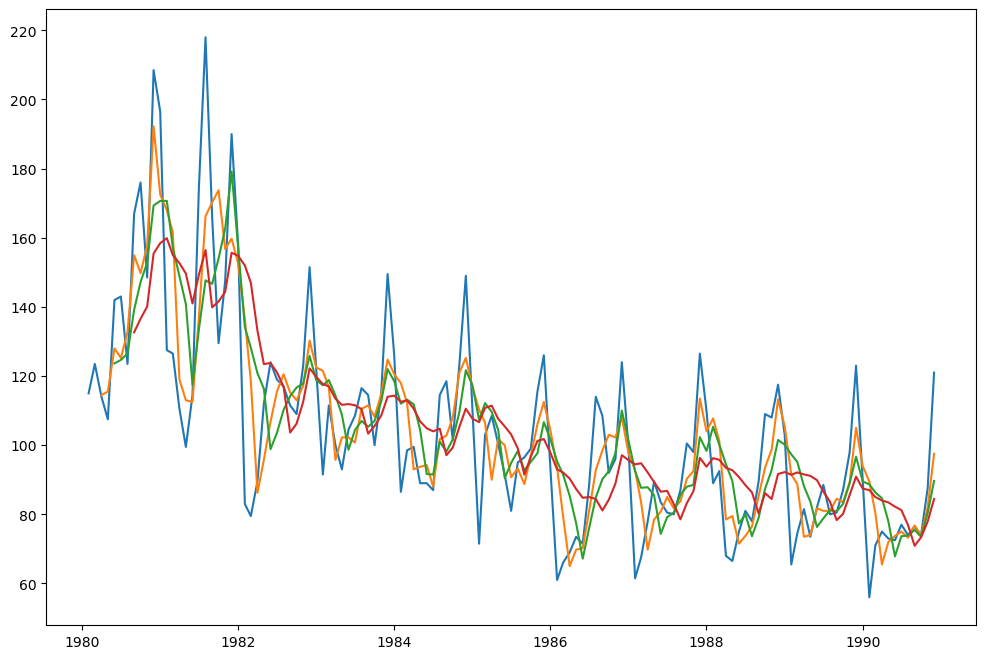

In [238]:
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

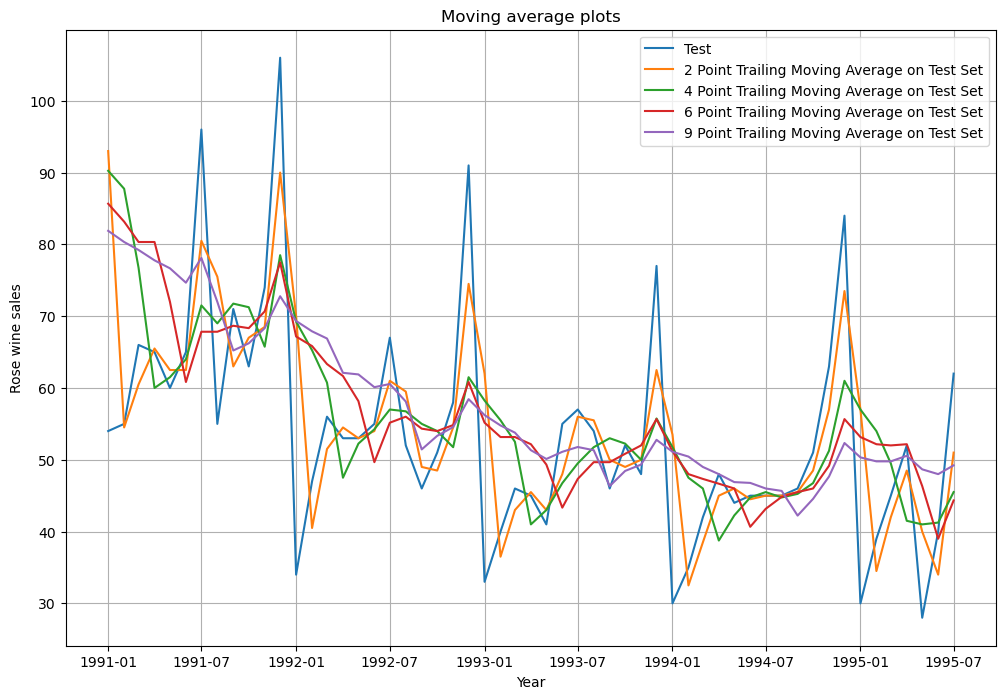

In [239]:
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('Rose wine sales')
plt.title('Moving average plots')
plt.grid();

In [240]:
### Model Evaluation

##### Done only on the test data.

#### RMSE Calculation as below 

## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.455
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.572
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.731 


Test RMSE
RegressionOnTime             15.275732
2pointTrailingMovingAverage  11.529409
4pointTrailingMovingAverage  14.455221
6pointTrailingMovingAverage  14.572009
9pointTrailingMovingAverage  14.731209

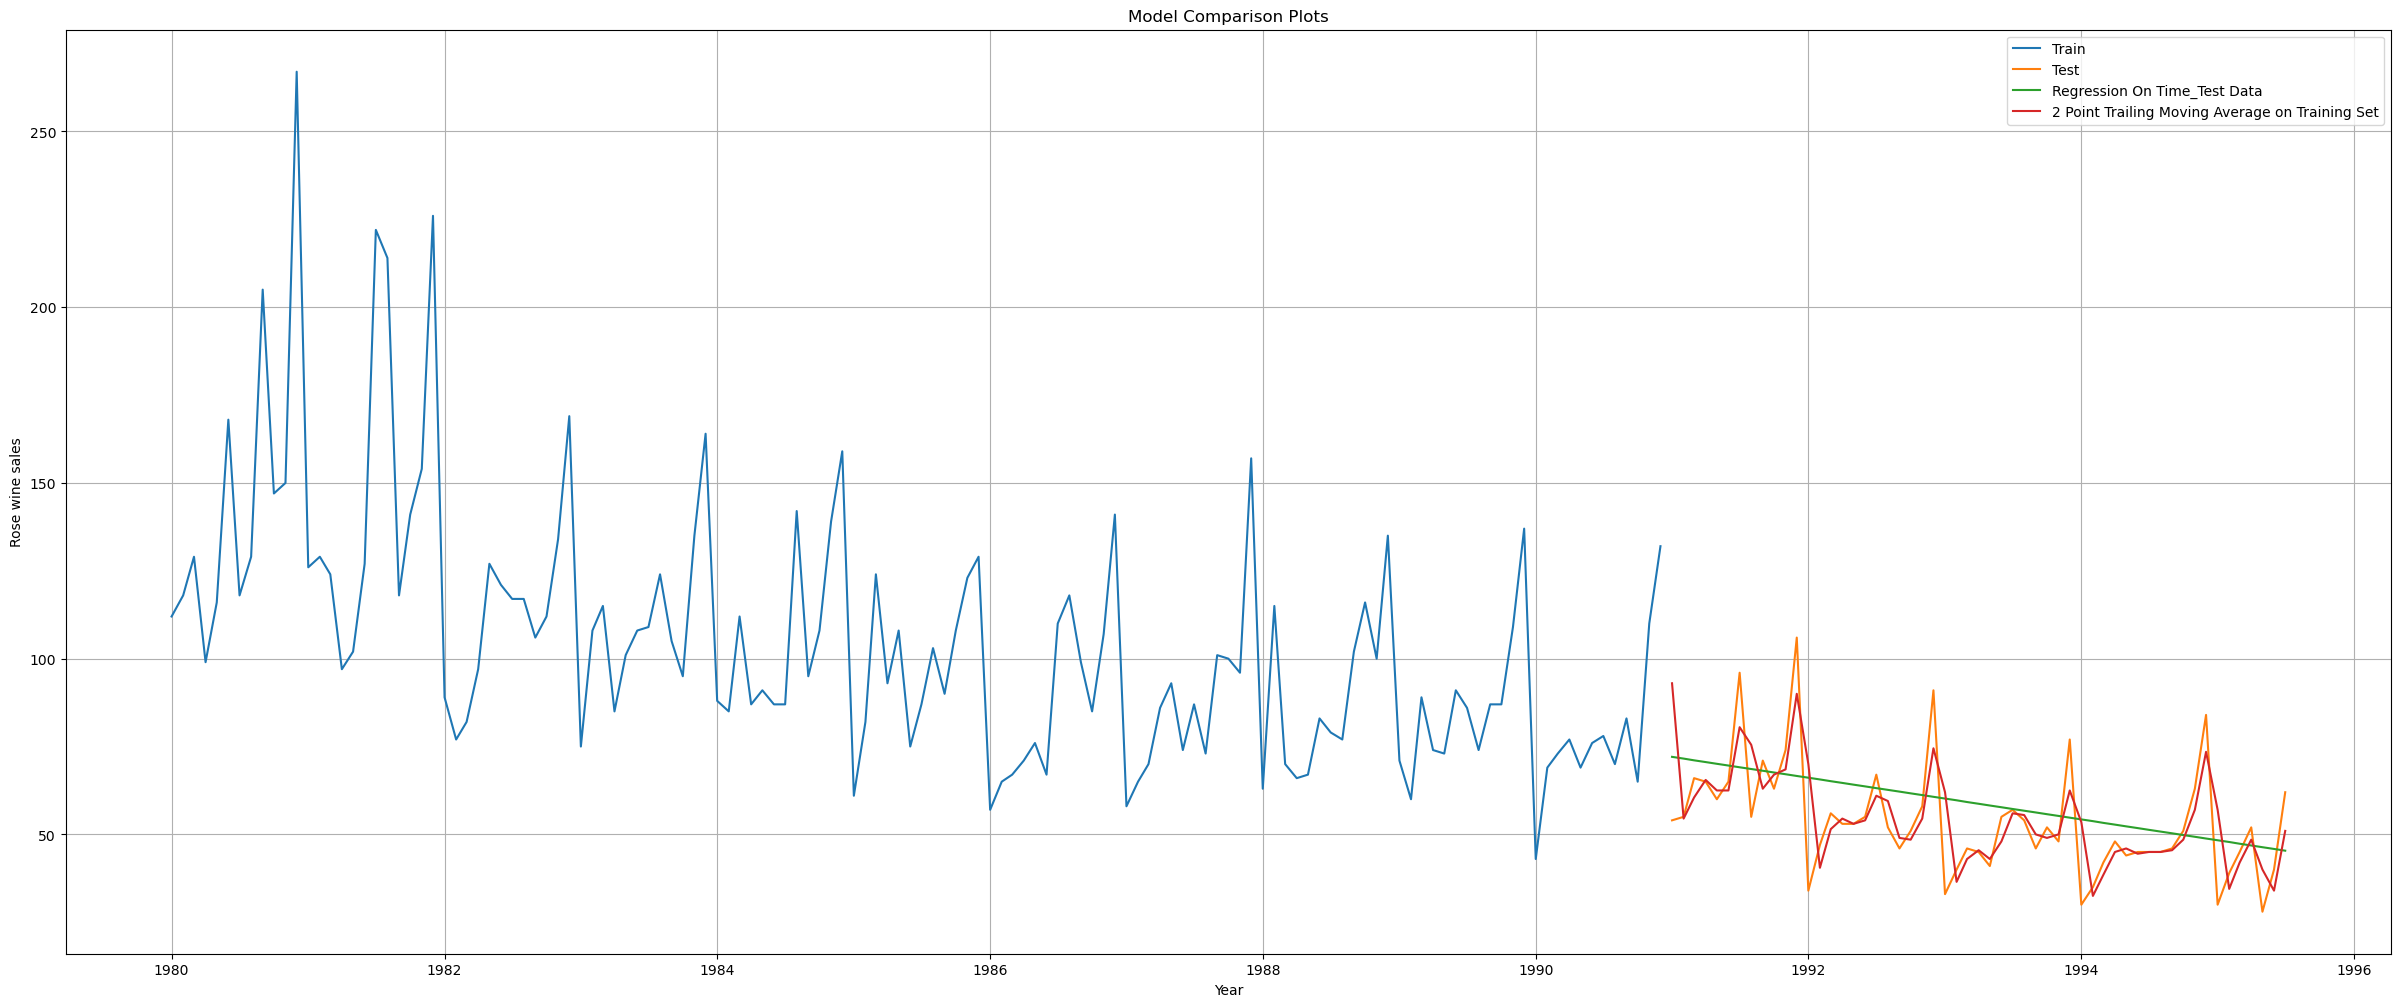

In [241]:
## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.xlabel('Year')
plt.ylabel('Rose wine sales')
plt.title('Moving average plots')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [242]:
## Method 3: Simple Exponential Smoothing

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train['Rose'])

model_SES_autofit = model_SES.fit(optimized=True)

model_SES_autofit.params

C:\Users\yamin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [243]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.104983
1991-02-01  55.0  87.104983
1991-03-01  66.0  87.104983
1991-04-01  65.0  87.104983
1991-05-01  60.0  87.104983

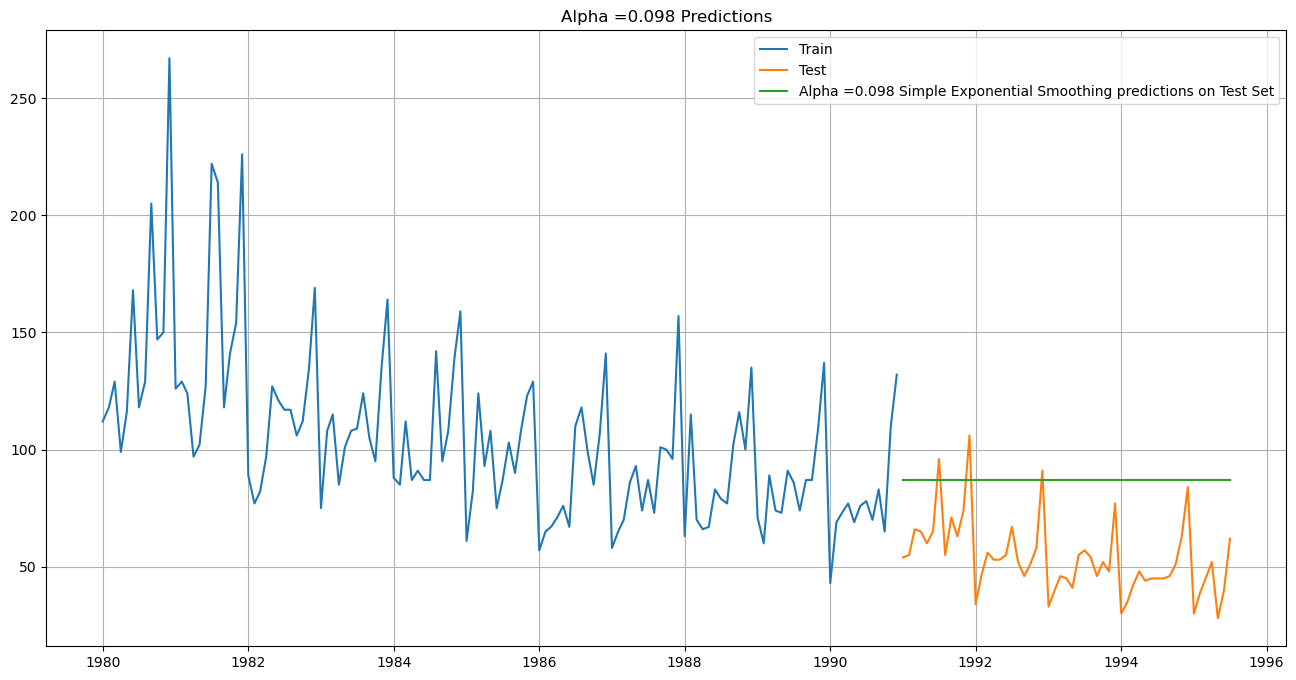

In [244]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

In [245]:
### Model Evaluation for $\alpha$ = 0.098 : Simple Exponential Smoothing

## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.817


Test RMSE
RegressionOnTime                        15.275732
2pointTrailingMovingAverage             11.529409
4pointTrailingMovingAverage             14.455221
6pointTrailingMovingAverage             14.572009
9pointTrailingMovingAverage             14.731209
Alpha=0.098,SimpleExponentialSmoothing  36.816889

Test RMSE
RegressionOnTime                        15.275732
2pointTrailingMovingAverage             11.529409
4pointTrailingMovingAverage             14.455221
6pointTrailingMovingAverage             14.572009
9pointTrailingMovingAverage             14.731209
Alpha=0.098,SimpleExponentialSmoothing  36.816889
Alpha=0.1,SimpleExponentialSmoothing    36.848694

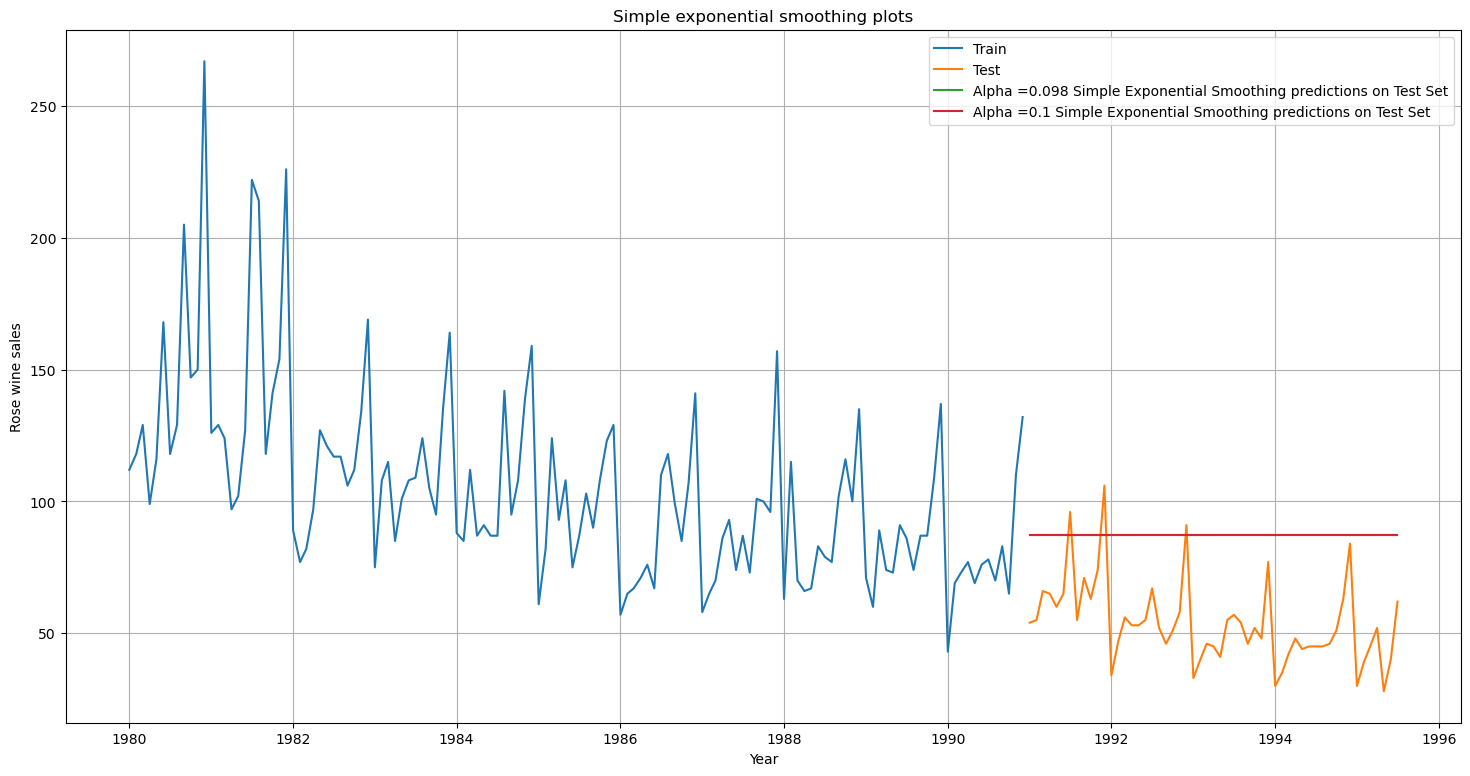

In [249]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.xlabel('Year')
plt.ylabel('Rose wine sales')
plt.title('Simple exponential smoothing plots')



plt.legend(loc='best')
plt.grid();

resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf


In [250]:
## Method 4: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

DES_train = train.copy()
DES_test = test.copy()

model_DES_optimal = Holt(DES_train['Rose']).fit(optimized=True)

model_DES_optimal.params

C:\Users\yamin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

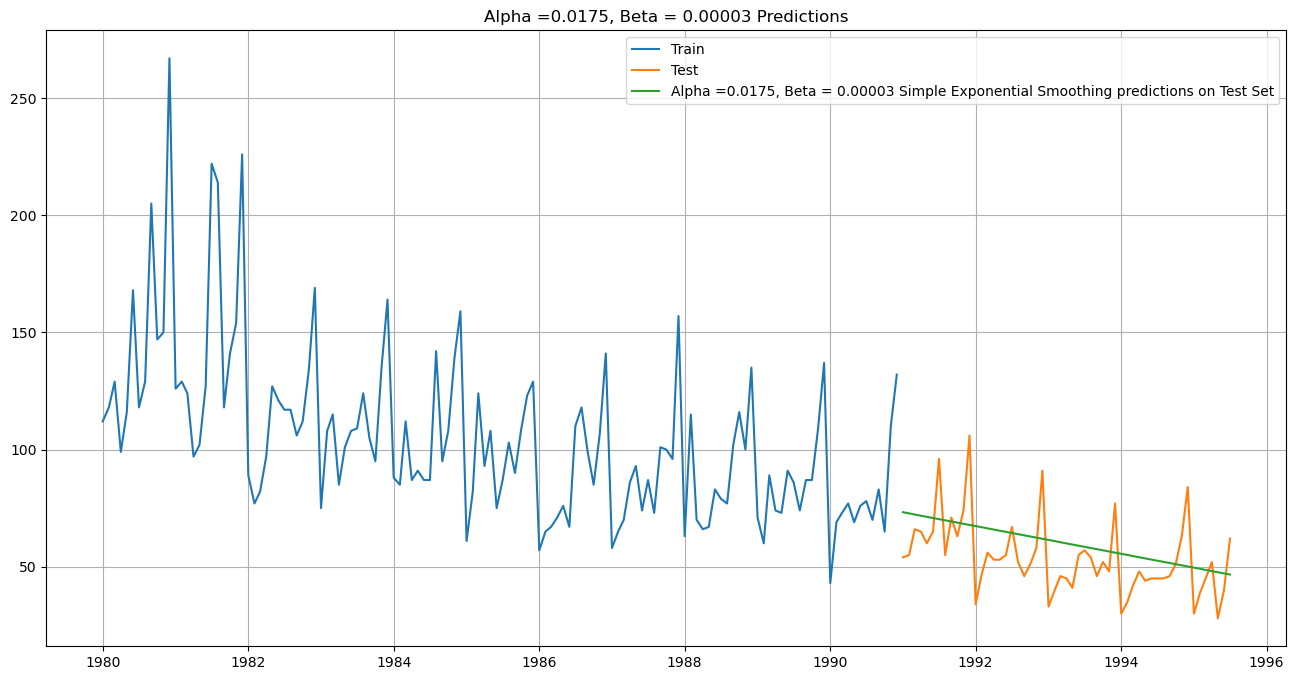

In [251]:
DES_test['predict'] = model_DES_optimal.forecast(steps=len(test))
DES_test.head()

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.0175, Beta = 0.00003 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0175, Beta = 0.00003 Predictions');

In [252]:
## Test Data

rmse_des_optimal_model_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.0175, Beta = 0.00003 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_des_optimal_model_test_1]},index=['Alpha =0.0175, Beta = 0.00003,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

For Alpha =0.0175, Beta = 0.00003 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 36.817


Test RMSE
RegressionOnTime                                    15.275732
2pointTrailingMovingAverage                         11.529409
4pointTrailingMovingAverage                         14.455221
6pointTrailingMovingAverage                         14.572009
9pointTrailingMovingAverage                         14.731209
Alpha=0.098,SimpleExponentialSmoothing              36.816889
Alpha=0.1,SimpleExponentialSmoothing                36.848694
Alpha =0.0175, Beta = 0.00003,DoubleExponential...  36.816889

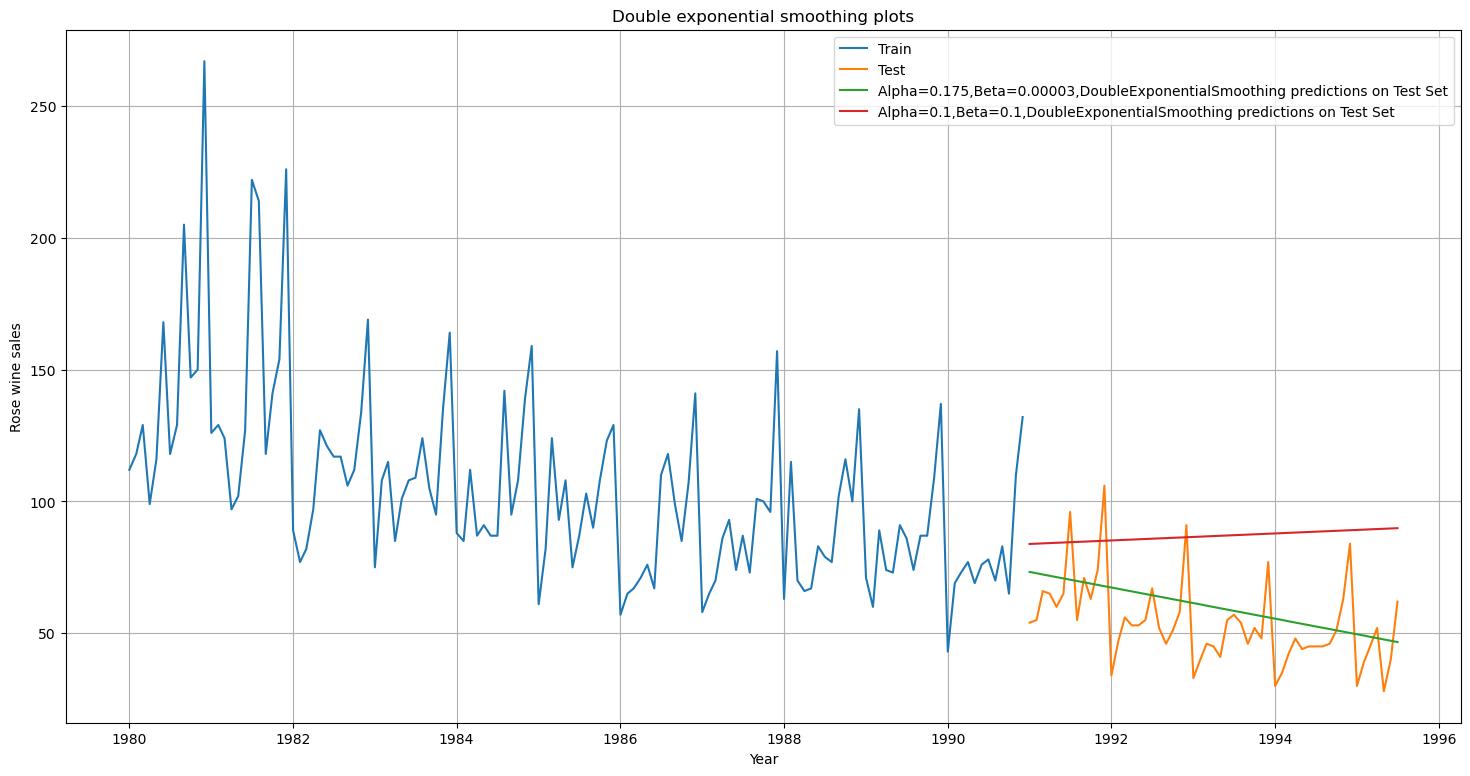

In [255]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=0.175,Beta=0.00003,DoubleExponentialSmoothing predictions on Test Set')

plt.xlabel('Year')
plt.ylabel('Rose wine sales')
plt.title('Double exponential smoothing plots')
plt.legend(loc='best')
plt.grid();

In [256]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                    15.275732
2pointTrailingMovingAverage                         11.529409
4pointTrailingMovingAverage                         14.455221
6pointTrailingMovingAverage                         14.572009
9pointTrailingMovingAverage                         14.731209
Alpha=0.098,SimpleExponentialSmoothing              36.816889
Alpha=0.1,SimpleExponentialSmoothing                36.848694
Alpha =0.0175, Beta = 0.00003,DoubleExponential...  36.816889
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.944741

In [257]:
## Method 5: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

TES_train = train.copy()
TES_test = test.copy()

model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='MS')

model_TES_autofit = model_TES.fit(optimized = True)

#The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

model_TES_autofit.params

{'smoothing_level': 0.0715106306609405,
 'smoothing_trend': 0.04529179757535142,
 'smoothing_seasonal': 7.244325029450242e-05,
 'damping_trend': nan,
 'initial_level': 130.40839142502193,
 'initial_trend': -0.77985743179386,
 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
        1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
        1.44724625, 1.99553681]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [258]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0     56.321655
1991-02-01  55.0     63.664690
1991-03-01  66.0     69.374024
1991-04-01  65.0     60.435528
1991-05-01  60.0     67.758341

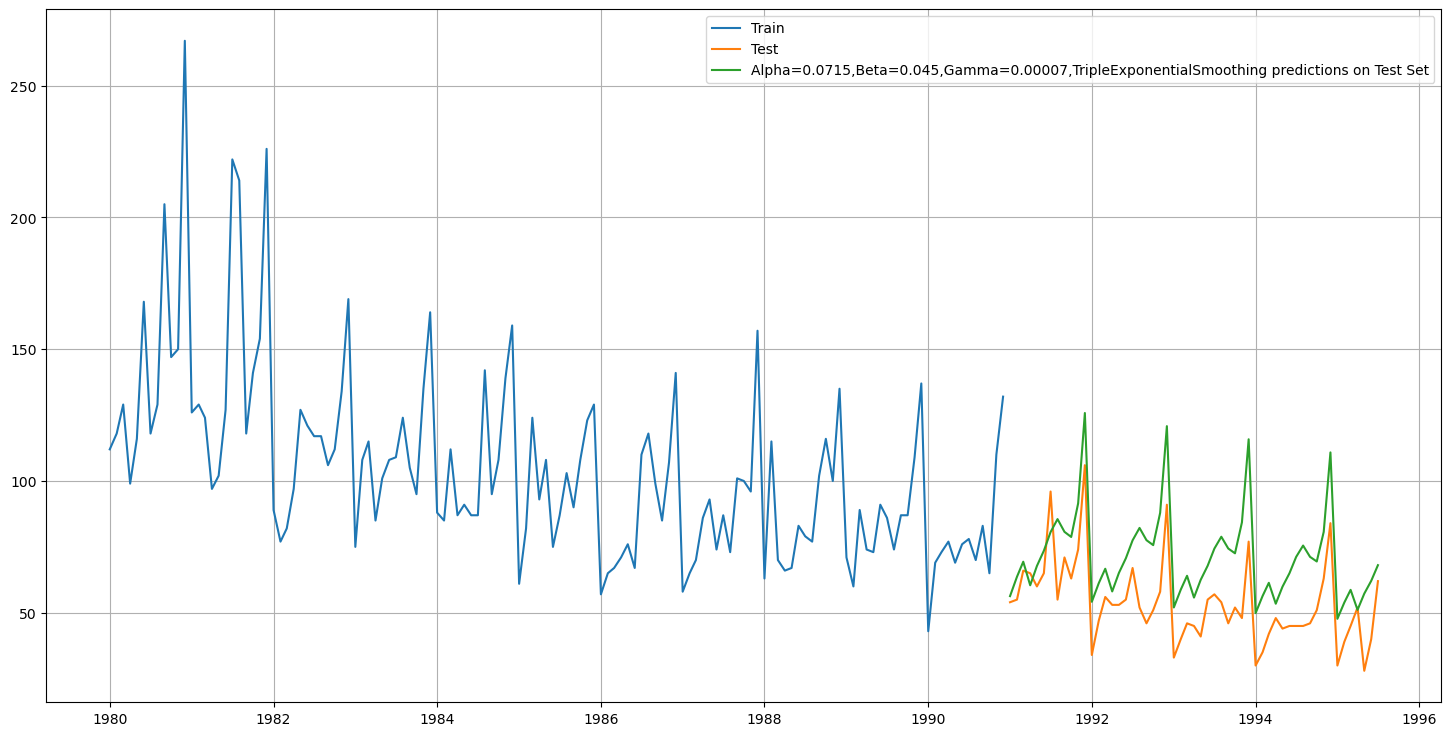

In [259]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0715,Beta=0.045,Gamma=0.00007,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();


In [260]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.0715,Beta=0.045,Gamma=0.00007, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.0715,Beta=0.045,Gamma=0.00007,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

For Alpha=0.0715,Beta=0.045,Gamma=0.00007, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.183


Test RMSE
RegressionOnTime                                    15.275732
2pointTrailingMovingAverage                         11.529409
4pointTrailingMovingAverage                         14.455221
6pointTrailingMovingAverage                         14.572009
9pointTrailingMovingAverage                         14.731209
Alpha=0.098,SimpleExponentialSmoothing              36.816889
Alpha=0.1,SimpleExponentialSmoothing                36.848694
Alpha =0.0175, Beta = 0.00003,DoubleExponential...  36.816889
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.944741
Alpha=0.0715,Beta=0.045,Gamma=0.00007,TripleExp...  20.182721

In [261]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)
resultsDf_8_2

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and wil

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(tes

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\3740171487.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

Alpha Values  Beta Values  Gamma Values    Train RMSE    Test RMSE
0             0.1          0.1           0.1     19.535124    11.846817
1             0.1          0.1           0.2     20.068055    11.632563
2             0.1          0.1           0.3     20.714821    11.758405
3             0.1          0.1           0.4     21.459373    12.114687
4             0.1          0.1           0.5     22.307144    12.645052
..            ...          ...           ...           ...          ...
995           1.0          1.0           0.6   2140.632923  6630.670675
996           1.0          1.0           0.7   3091.001599  9721.159235
997           1.0          1.0           0.8   2438.212926  2573.837848
998           1.0          1.0           0.9  28835.801098  3522.898638
999           1.0          1.0           1.0   1577.905281  3104.657151

[1000 rows x 5 columns]

In [262]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
10            0.1          0.2           0.1   19.770392   9.236464
11            0.1          0.2           0.2   20.253487   9.505572
151           0.2          0.6           0.2   23.129850   9.561249
142           0.2          0.5           0.3   23.656276   9.884070
12            0.1          0.2           0.3   20.871304   9.895300

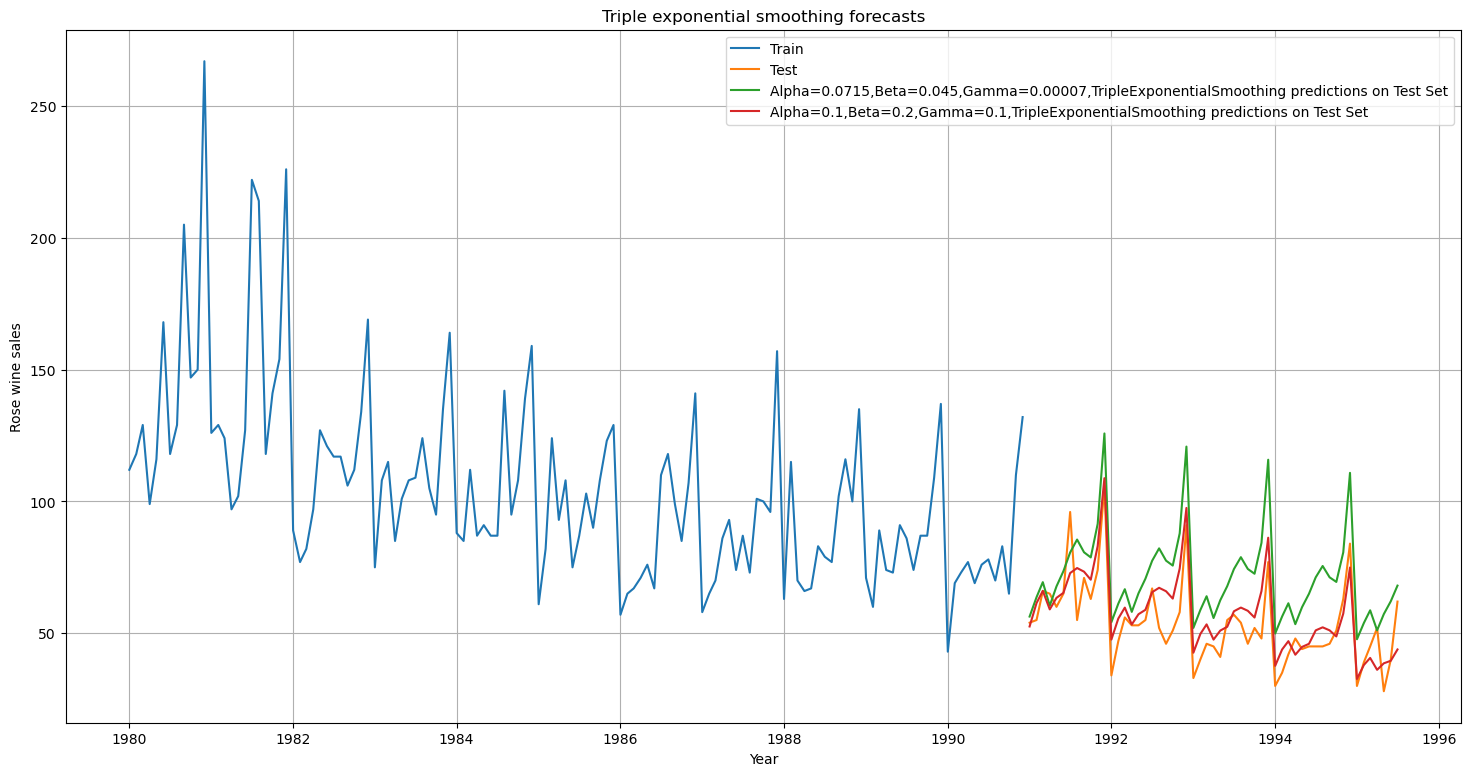

In [263]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['auto_predict'], label='Alpha=0.0715,Beta=0.045,Gamma=0.00007,TripleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1, 0.2, 0.1], label='Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')

plt.xlabel('Year')
plt.ylabel('Rose wine sales')
plt.title('Triple exponential smoothing forecasts')
plt.legend(loc='best')
plt.grid();

In [264]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.236464
2pointTrailingMovingAverage                         11.529409
4pointTrailingMovingAverage                         14.455221
6pointTrailingMovingAverage                         14.572009
9pointTrailingMovingAverage                         14.731209
RegressionOnTime                                    15.275732
Alpha=0.0715,Beta=0.045,Gamma=0.00007,TripleExp...  20.182721
Alpha=0.098,SimpleExponentialSmoothing              36.816889
Alpha =0.0175, Beta = 0.00003,DoubleExponential...  36.816889
Alpha=0.1,SimpleExponentialSmoothing                36.848694
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.944741

#For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.1, $\beta$ = 0.2 and $\gamma$ = 0.1.

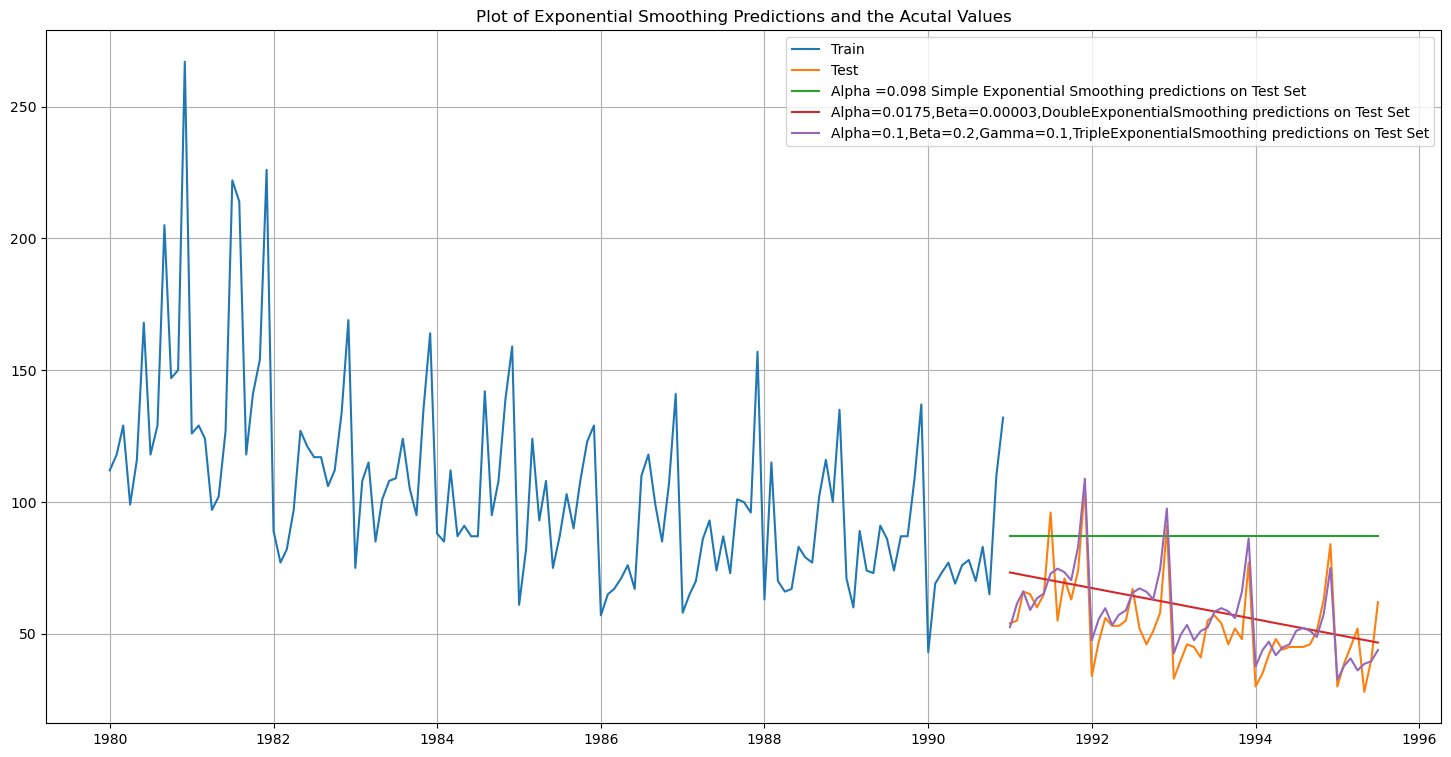

In [265]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict'], label='Alpha=0.0175,Beta=0.00003,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1, 0.2, 0.1], label='Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');


RMSE: 19.651464121177778


C:\Users\yamin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


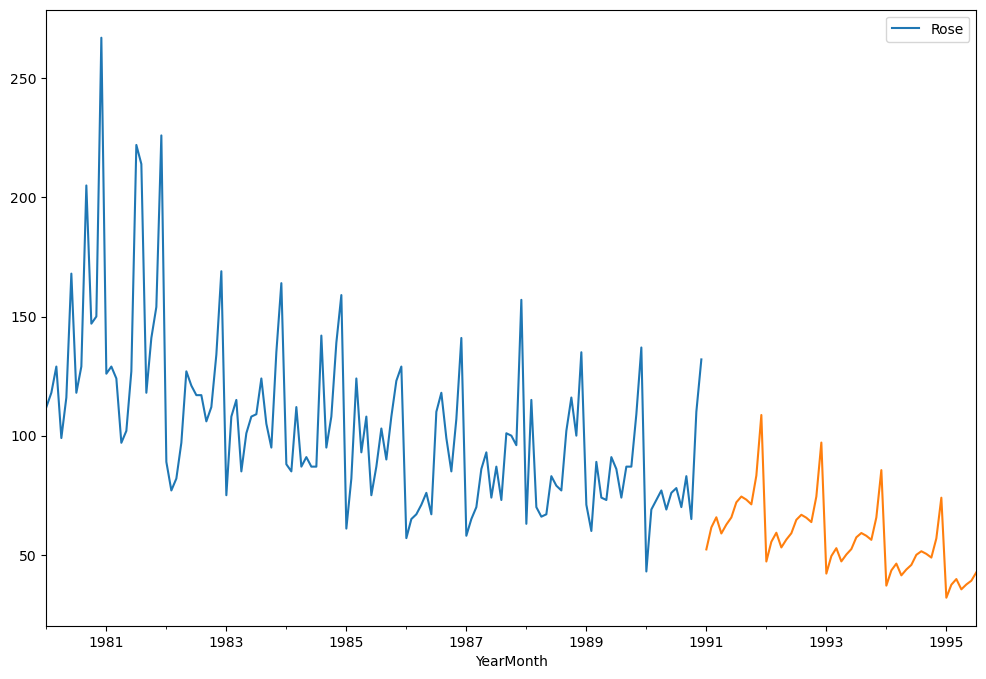

In [266]:
#The best model to be built on the whole data is the following:

#* Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing

df = pd.DataFrame(train['Rose'])
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.2,
                                                                 smoothing_seasonal=0.1)

RMSE_fullmodel1 = metrics.mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test))

train.plot()
prediction_1.plot();

In [267]:
#One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1991-01-01  13.639090   52.262645   90.886199
1991-02-01  22.860530   61.484084  100.107639
1991-03-01  27.121341   65.744896  104.368451
1991-04-01  20.324386   58.947941   97.571495
1991-05-01  24.054387   62.677942  101.301496

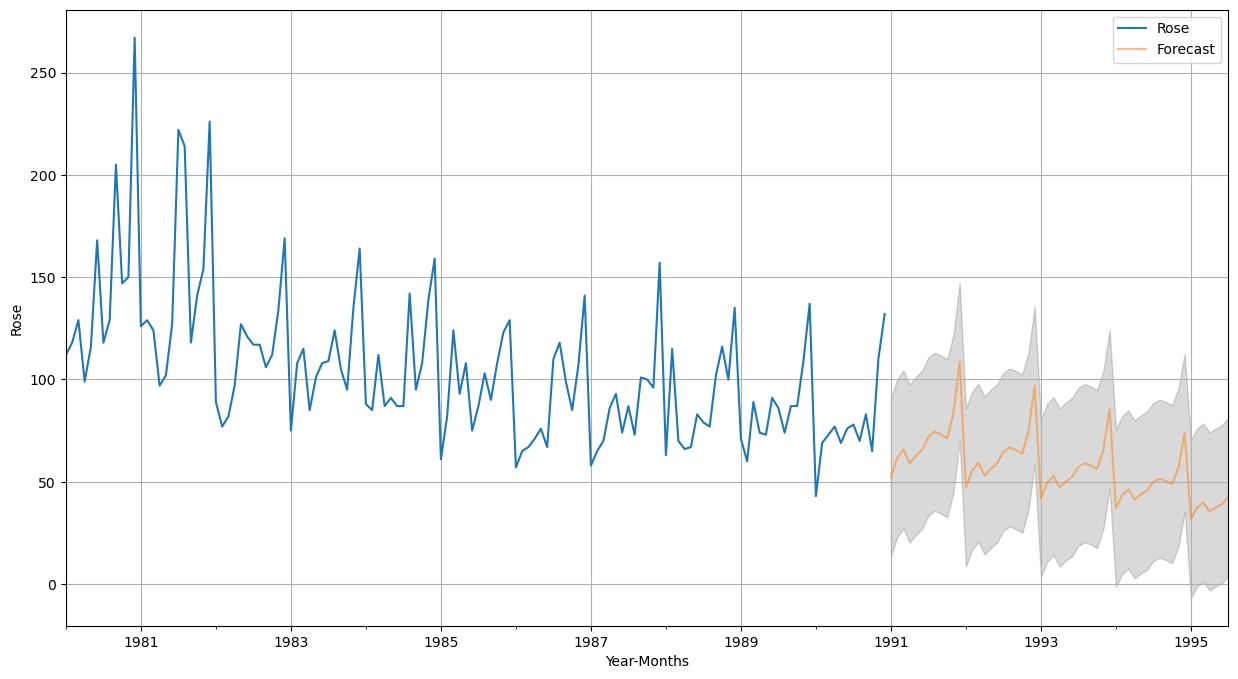

In [268]:
# plot the forecast along with the confidence band

axis = train.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## How to check for Stationarity?


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**




In [269]:
from statsmodels.tsa.stattools import adfuller

df_Rose = pd.DataFrame(Rose_data['Rose'])
dftest = adfuller(df_Rose)#python implementation of dicky fuller test 
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput,'\n')

Test Statistic                  -1.874856
p-value                          0.343981
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [270]:
#failed to reject null hypothesis. time series data is non stationary

In [271]:
df_stationary = pd.DataFrame(df_Rose['Rose'].diff().dropna())

In [272]:
df_stationary

Rose
YearMonth       
1980-02-01   6.0
1980-03-01  11.0
1980-04-01 -30.0
1980-05-01  17.0
1980-06-01  52.0
...          ...
1995-03-01   6.0
1995-04-01   7.0
1995-05-01 -24.0
1995-06-01  12.0
1995-07-01  22.0

[186 rows x 1 columns]

In [273]:
dftest = adfuller(df_stationary['Rose'])#python implementation of dicky fuller test 
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput,'\n')

Test Statistic                -8.044139e+00
p-value                        1.813580e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



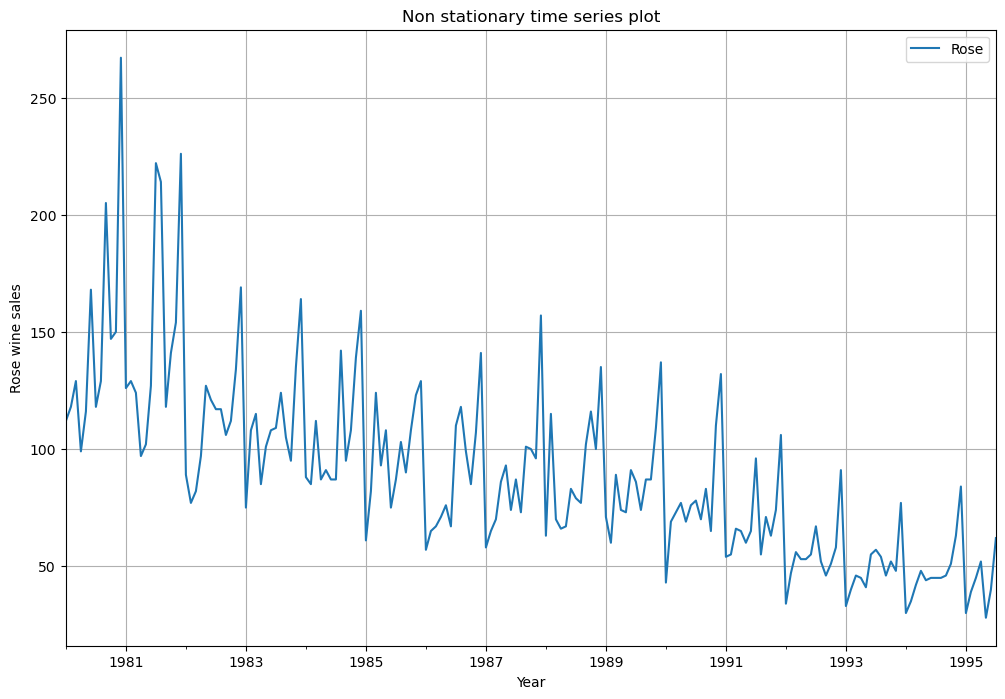

In [274]:
# reject null hypothesis, time series is stationary
Rose_data['Rose'].plot();
plt.xlabel('Year')
plt.ylabel('Rose wine sales')
plt.title('Non stationary time series plot')
plt.legend(loc='best')
plt.grid()
plt.show()

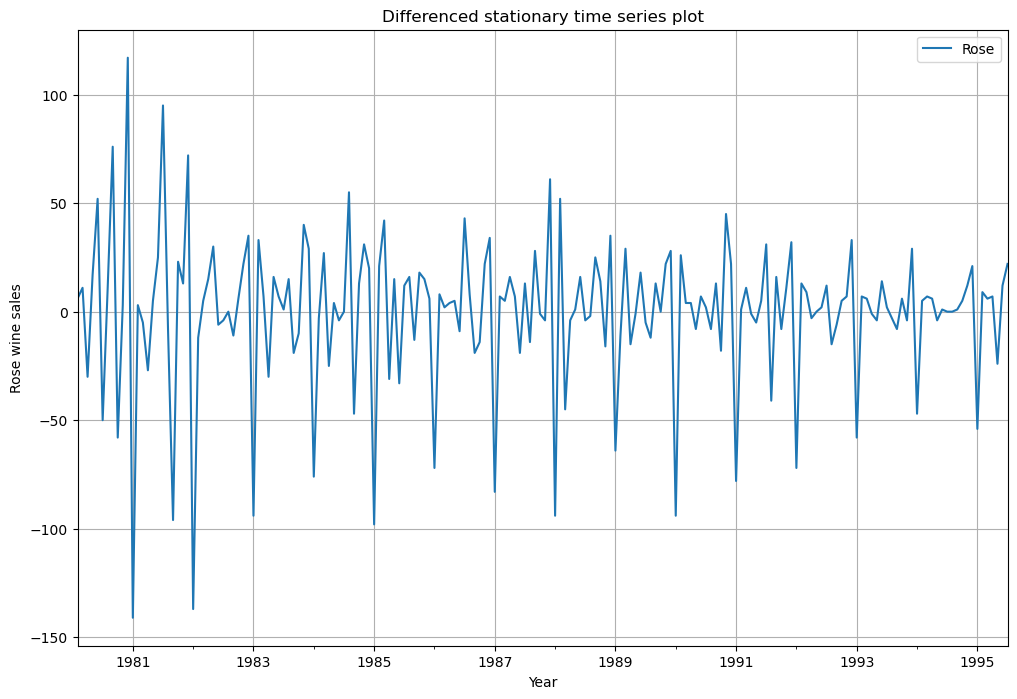

In [275]:
df_stationary['Rose'].plot()
plt.xlabel('Year')
plt.ylabel('Rose wine sales')
plt.legend(loc='best')
plt.title('Differenced stationary time series plot')
plt.grid()
plt.show()

 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [276]:
#Building training and test data from the stationary time series in order to apply models.

In [277]:
Rose_data.head()

Rose  Year Month
YearMonth                    
1980-01-01  112.0  1980   Jan
1980-02-01  118.0  1980   Feb
1980-03-01  129.0  1980   Mar
1980-04-01   99.0  1980   Apr
1980-05-01  116.0  1980   May

In [278]:
Rose_data.tail()

Rose  Year Month
YearMonth                   
1995-03-01  45.0  1995   Mar
1995-04-01  52.0  1995   Apr
1995-05-01  28.0  1995   May
1995-06-01  40.0  1995   Jun
1995-07-01  62.0  1995   Jul

In [279]:
train = pd.DataFrame(Rose_data[Rose_data.index < '01-01-1991']['Rose'])
test = pd.DataFrame(Rose_data[Rose_data.index >= '01-01-1991']['Rose'])

In [280]:
## This is to display multiple data frames from one cell
from IPython.display import display

print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [281]:
train.shape

(132, 1)

In [287]:
import itertools

p= range(0,5)
q = range(0,5)
d= range(0,5)
#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [288]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [289]:
#automated version of arima

# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [292]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

In [479]:


for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

ARIMA(0, 0, 0) - AIC:1324.899702958276
ARIMA(0, 0, 1) - AIC:1305.4684058450507
ARIMA(0, 0, 2) - AIC:1306.587015379451
ARIMA(0, 0, 3) - AIC:1302.3447243870867
ARIMA(0, 0, 4) - AIC:1301.989962321436
ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.67152885358
ARIMA(0, 1, 3) - AIC:1280.5453761734652
ARIMA(0, 1, 4) - AIC:1281.6766982143936
ARIMA(0, 2, 0) - AIC:1453.6864098008941
ARIMA(0, 2, 1) - AIC:1330.8639794852443
ARIMA(0, 2, 2) - AIC:1281.5704675246998
ARIMA(0, 2, 3) - AIC:1285.201043810001
ARIMA(0, 2, 4) - AIC:1278.4310013079112
ARIMA(0, 3, 0) - AIC:1590.123489428283
ARIMA(0, 3, 1) - AIC:1450.3592220690423
ARIMA(0, 3, 2) - AIC:1333.1882150602441
ARIMA(0, 3, 3) - AIC:1289.797246282084
ARIMA(0, 3, 4) - AIC:1289.0185640805964
ARIMA(0, 4, 0) - AIC:1732.0727367055674
ARIMA(0, 4, 1) - AIC:1585.4223122132762
ARIMA(0, 4, 2) - AIC:1450.9471815156867
ARIMA(0, 4, 3) - AIC:1339.1505064644093
ARIMA(0, 4, 4) - AIC:1305.6727790333634
ARIMA(1,

param          AIC
58   (2, 1, 3)  1274.696103
37   (1, 2, 2)  1278.058579
14   (0, 2, 4)  1278.431001
108  (4, 1, 3)  1278.451407
39   (1, 2, 4)  1278.606955

In [293]:
#### <u>Building ARIMA model with best parameters p,d,q</u>

best_model = ARIMA(train['Rose'],order = (2,1,3), freq='MS')
best_results = best_model.fit()

print(best_results.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 06 Aug 2023   AIC                           1274.696
Time:                        11:50:05   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.706
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6773      0.084    -19.962      0.000      -1.842      -1.513
ar.L2         -0.7281      0.084     -8.661      0.000      -0.893      -0.563
ma.L1          1.0460      0.684      1.530      0.1

In [294]:
test_predicted = best_results.forecast(steps=len(test))#forecasting values 
test_predicted.head()

1991-01-01    85.624392
1991-02-01    90.570708
1991-03-01    81.982766
1991-04-01    92.786210
1991-05-01    80.917993
Freq: MS, Name: predicted_mean, dtype: float64

In [295]:
testCopy1 = test.copy()
#invdy=cumsum(c(y[1],dy))
testCopy1['Rose_forecasted'] = test_predicted
testCopy1.head()

Rose  Rose_forecasted
YearMonth                        
1991-01-01  54.0        85.624392
1991-02-01  55.0        90.570708
1991-03-01  66.0        81.982766
1991-04-01  65.0        92.786210
1991-05-01  60.0        80.917993

In [296]:
# Compute the root mean square error
mse = ((testCopy1['Rose'] - testCopy1['Rose_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 36.858


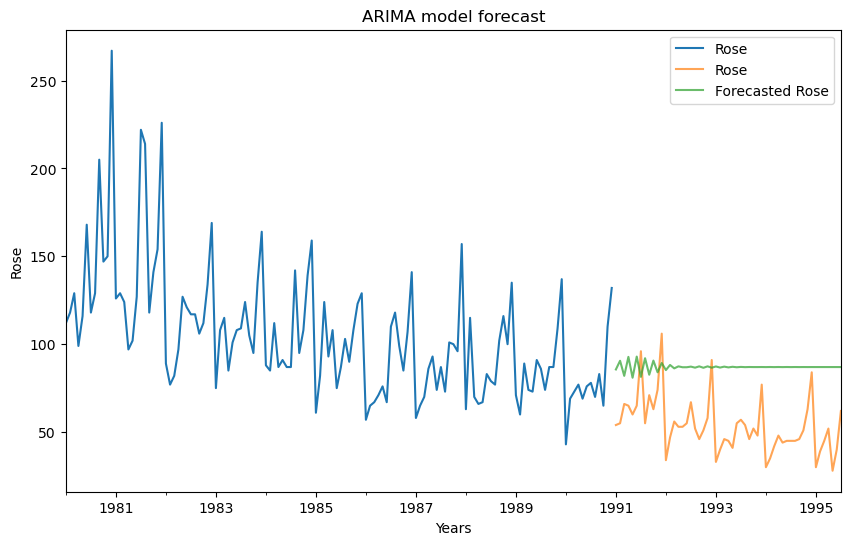

In [297]:
axis = train['Rose'].plot(label='Rose', figsize=(10, 6))
testCopy1['Rose'].plot(ax=axis, label='Rose', alpha=0.7)
testCopy1['Rose_forecasted'].plot(ax=axis, label='Forecasted Rose', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose')
plt.title('ARIMA model forecast')
plt.legend(loc='best')
plt.show()
plt.close()

In [298]:
resultsDf2 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best ARIMA Model : ARIMA(2,1,3)'])

resultsDf2
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.236464
2pointTrailingMovingAverage                         11.529409
4pointTrailingMovingAverage                         14.455221
6pointTrailingMovingAverage                         14.572009
9pointTrailingMovingAverage                         14.731209
RegressionOnTime                                    15.275732
Alpha=0.0715,Beta=0.045,Gamma=0.00007,TripleExp...  20.182721
Alpha=0.098,SimpleExponentialSmoothing              36.816889
Alpha =0.0175, Beta = 0.00003,DoubleExponential...  36.816889
Alpha=0.1,SimpleExponentialSmoothing                36.848694
Best ARIMA Model : ARIMA(2,1,3)                     36.858265
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.944741

In [299]:
#Automated SARIMA model

In [302]:
p = range(1, 4)
q = (2,5)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (1, 0, 5)(1, 0, 5, 6)
Model: (1, 1, 2)(1, 1, 2, 6)
Model: (1, 1, 5)(1, 1, 5, 6)
Model: (2, 0, 2)(2, 0, 2, 6)
Model: (2, 0, 5)(2, 0, 5, 6)
Model: (2, 1, 2)(2, 1, 2, 6)
Model: (2, 1, 5)(2, 1, 5, 6)
Model: (3, 0, 2)(3, 0, 2, 6)
Model: (3, 0, 5)(3, 0, 5, 6)
Model: (3, 1, 2)(3, 1, 2, 6)
Model: (3, 1, 5)(3, 1, 5, 6)


In [303]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [163]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA_AIC.sort_values(by=['AIC']).head()

SARIMA(1, 0, 2)x(1, 0, 2, 6) - AIC:1081.474001383718


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 5, 6) - AIC:857.9114726692922


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 2, 6) - AIC:961.730760513061


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 1, 5, 6) - AIC:779.4612781727864


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 2, 6) - AIC:1055.5510677723605


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 5, 6) - AIC:837.276632137041


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 1, 2, 6) - AIC:963.5065808718433


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 1, 5, 6) - AIC:793.2601331343603


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(3, 0, 2, 6) - AIC:1018.7954370307573


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(3, 0, 5, 6) - AIC:839.2652562239125


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(3, 1, 2, 6) - AIC:925.7618050716457


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(3, 1, 5, 6) - AIC:794.1620268071484


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 5)x(1, 0, 2, 6) - AIC:1056.8283011300614


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 5)x(1, 0, 5, 6) - AIC:840.2618993714098


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 5)x(1, 1, 2, 6) - AIC:931.1751665242543


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 5)x(1, 1, 5, 6) - AIC:765.9637678839649


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 5)x(2, 0, 2, 6) - AIC:1030.511880483046


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 5)x(2, 0, 5, 6) - AIC:809.1219114559104


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 5)x(2, 1, 2, 6) - AIC:933.1743148588887


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 5)x(2, 1, 5, 6) - AIC:762.0794035176247


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 5)x(3, 0, 2, 6) - AIC:1020.2728088631977


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 5)x(3, 0, 5, 6) - AIC:811.0301500533222


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 5)x(3, 1, 2, 6) - AIC:943.9253355858383


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 5)x(3, 1, 5, 6) - AIC:761.0590594905988


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1061.3428437955124


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 5, 6) - AIC:854.00682190181


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 2, 6) - AIC:959.067737773535


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 5, 6) - AIC:775.009055030149


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1041.6558175324851


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 5, 6) - AIC:832.7327752932569


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 2, 6) - AIC:960.6825966949926


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 5, 6) - AIC:776.0925805798701


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 2, 6) - AIC:1006.4311859137158


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 5, 6) - AIC:834.7261498440594


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 1, 2, 6) - AIC:917.5323556350086


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 1, 5, 6) - AIC:777.0011666575094


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(1, 0, 2, 6) - AIC:1026.7294554481632


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(1, 0, 5, 6) - AIC:820.7227203854922


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(1, 1, 2, 6) - AIC:922.8215447939086


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(1, 1, 5, 6) - AIC:750.8103593464342


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(2, 0, 2, 6) - AIC:1002.9285059808722


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(2, 0, 5, 6) - AIC:809.4922423330062


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(2, 1, 2, 6) - AIC:926.5065994649722


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(2, 1, 5, 6) - AIC:751.9402531258862


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(3, 0, 2, 6) - AIC:1006.9478203358394


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(3, 0, 5, 6) - AIC:811.1851197622559


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(3, 1, 2, 6) - AIC:916.9647660943317


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(3, 1, 5, 6) - AIC:752.1757662154621


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 2, 6) - AIC:1067.9632069650957


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 5, 6) - AIC:860.643566124925


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 2, 6) - AIC:963.5080239492445


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 1, 5, 6) - AIC:795.2750705373596


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 2, 6) - AIC:1057.0850407630503


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 5, 6) - AIC:836.5729454730168


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 2, 6) - AIC:965.3365384158203


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 1, 5, 6) - AIC:802.3794124808875


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(3, 0, 2, 6) - AIC:982.7637791003319


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(3, 0, 5, 6) - AIC:838.506539315332


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(3, 1, 2, 6) - AIC:911.6623927321615


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(3, 1, 5, 6) - AIC:799.903605428299


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 5)x(1, 0, 2, 6) - AIC:1057.8866388437948


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 5)x(1, 0, 5, 6) - AIC:832.6013041155056


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 5)x(1, 1, 2, 6) - AIC:930.4040055715925


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 5)x(1, 1, 5, 6) - AIC:757.3570554708442


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 5)x(2, 0, 2, 6) - AIC:1040.3849704898096


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 5)x(2, 0, 5, 6) - AIC:807.1651838874818


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 5)x(2, 1, 2, 6) - AIC:932.3877719745309


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 5)x(2, 1, 5, 6) - AIC:759.1380941874992


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 5)x(3, 0, 2, 6) - AIC:985.0576243985387


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 5)x(3, 0, 5, 6) - AIC:807.7690157429067


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 5)x(3, 1, 2, 6) - AIC:909.1992841096337


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 5)x(3, 1, 5, 6) - AIC:757.9921347144758


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103232077257


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 5, 6) - AIC:852.6626836111974


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 2, 6) - AIC:957.8063010221384


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 5, 6) - AIC:776.8650843340221


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.220578579866


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 5, 6) - AIC:834.3189477547414


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 2, 6) - AIC:988.6109084038152


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 5, 6) - AIC:778.7328970367089


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:962.9964635333628


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 5, 6) - AIC:836.219504257202


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 1, 2, 6) - AIC:920.3835412333274


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 1, 5, 6) - AIC:777.9972259518674


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(1, 0, 2, 6) - AIC:1012.1204752683348


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(1, 0, 5, 6) - AIC:822.7189746034065


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(1, 1, 2, 6) - AIC:924.6707871748738


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(1, 1, 5, 6) - AIC:752.6891935338738


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(2, 0, 2, 6) - AIC:983.3113934297913


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(2, 0, 5, 6) - AIC:802.3329615741156


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(2, 1, 2, 6) - AIC:926.6647489014222


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(2, 1, 5, 6) - AIC:753.6901077939351


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(3, 0, 2, 6) - AIC:963.2116726791506


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(3, 0, 5, 6) - AIC:805.3973259857145


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(3, 1, 2, 6) - AIC:917.1247998960052


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(3, 1, 5, 6) - AIC:754.0524422804917


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 2)x(1, 0, 2, 6) - AIC:1091.7664625702118


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 2)x(1, 0, 5, 6) - AIC:861.3242619571254


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 2)x(1, 1, 2, 6) - AIC:976.8536993612068


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 2)x(1, 1, 5, 6) - AIC:797.6574156521143


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 2)x(2, 0, 2, 6) - AIC:1040.529657688219


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 2)x(2, 0, 5, 6) - AIC:837.7931772929643


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 2)x(2, 1, 2, 6) - AIC:981.8269559737306


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 2)x(2, 1, 5, 6) - AIC:798.6526620415062


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 2)x(3, 0, 2, 6) - AIC:978.1680638630698


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 2)x(3, 0, 5, 6) - AIC:839.7653031870733


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 2)x(3, 1, 2, 6) - AIC:929.7678401160701


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 2)x(3, 1, 5, 6) - AIC:805.3634301386633


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 5)x(1, 0, 2, 6) - AIC:1026.1483810777831


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 5)x(1, 0, 5, 6) - AIC:834.0514152171056


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 5)x(1, 1, 2, 6) - AIC:926.6267402173914


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 5)x(1, 1, 5, 6) - AIC:759.0446288437117


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 5)x(2, 0, 2, 6) - AIC:1009.6040791204085


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 5)x(2, 0, 5, 6) - AIC:821.409926547409


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 5)x(2, 1, 2, 6) - AIC:928.5838827533162


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 5)x(2, 1, 5, 6) - AIC:764.8170362451947


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 5)x(3, 0, 2, 6) - AIC:970.8659193954652


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 5)x(3, 0, 5, 6) - AIC:822.3085803158856


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 0, 5)x(3, 1, 2, 6) - AIC:917.1857320414188


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\yamin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 5)x(3, 1, 5, 6) - AIC:759.8813834990707


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 2, 6) - AIC:1063.0936401744686


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 5, 6) - AIC:855.0722855602414


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 1, 2, 6) - AIC:959.6222380166789


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 1, 5, 6) - AIC:777.5701693187978


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 2, 6) - AIC:1046.420080023995


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 5, 6) - AIC:836.2841262170491


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 1, 2, 6) - AIC:961.5196666014505


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 1, 5, 6) - AIC:778.878266126338


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 2, 6) - AIC:962.5692236510216


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 5, 6) - AIC:838.1340799991701


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 1, 2, 6) - AIC:910.3777882189374


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 1, 5, 6) - AIC:778.9166720465868


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(1, 0, 2, 6) - AIC:1027.3015841889724


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(1, 0, 5, 6) - AIC:821.8620830535073


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(1, 1, 2, 6) - AIC:926.0676069630999


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(1, 1, 5, 6) - AIC:754.5870246329281


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(2, 0, 2, 6) - AIC:985.0077030780878


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(2, 0, 5, 6) - AIC:806.8828108343336


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(2, 1, 2, 6) - AIC:928.060188587149


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(2, 1, 5, 6) - AIC:755.6468059992403


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(3, 0, 2, 6) - AIC:963.4781358443108


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(3, 0, 5, 6) - AIC:806.6255192677833


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(3, 1, 2, 6) - AIC:896.8555076941182


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(3, 1, 5, 6) - AIC:755.9633940707527


C:\Users\yamin\AppData\Local\Temp\ipykernel_6824\1488931860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


param      seasonal         AIC
39  (1, 1, 5)  (1, 1, 5, 6)  750.810359
43  (1, 1, 5)  (2, 1, 5, 6)  751.940253
47  (1, 1, 5)  (3, 1, 5, 6)  752.175766
87  (2, 1, 5)  (1, 1, 5, 6)  752.689194
91  (2, 1, 5)  (2, 1, 5, 6)  753.690108

In [164]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1,1,5),
                                seasonal_order=(1,1,5,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 5)x(1, 1, 5, 6)   Log Likelihood                -362.405
Date:                           Sun, 06 Aug 2023   AIC                            750.810
Time:                                   11:34:23   BIC                            783.163
Sample:                                        0   HQIC                           763.851
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7447      0.189     -3.933      0.000      -1.116      -0.374
ma.L1         -0.9507      0.762     -1.248

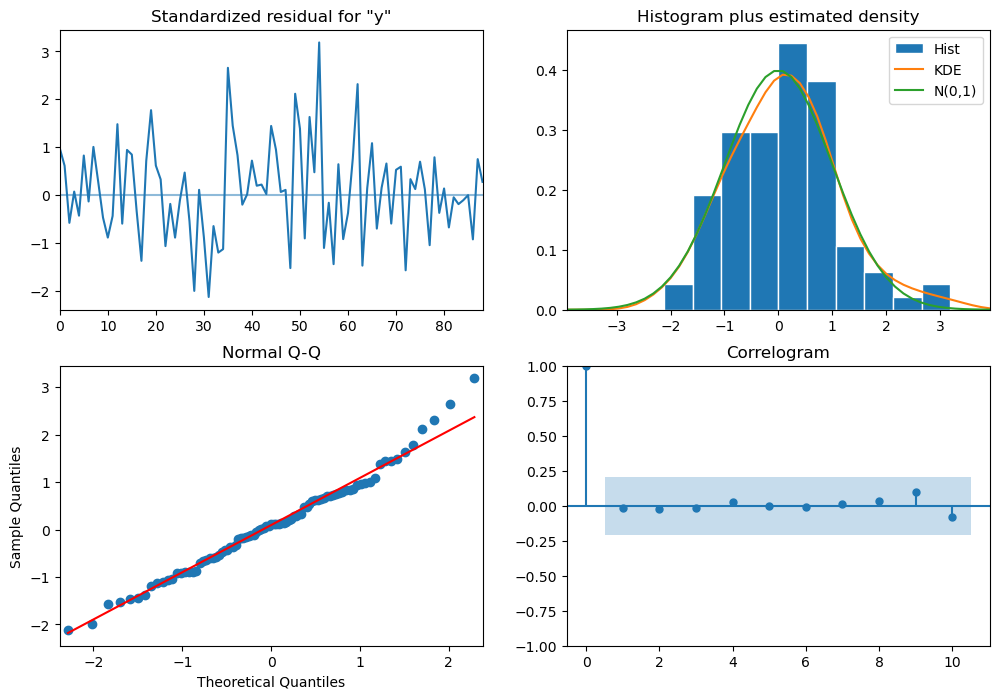

In [304]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [305]:
## Predict on the Test Set using this model and evaluate the model.

predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  50.824747  13.271585      24.812920      76.836575
1  58.995885  13.430584      32.672424      85.319347
2  64.457852  13.433306      38.129055      90.786649
3  64.225173  13.433697      37.895611      90.554735
4  73.880947  13.513359      47.395250     100.366644

In [306]:
rmse = metrics.mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

15.308698281275142


In [307]:
testCopy1 = test.copy()
testCopy1['SARIMA forecasted'] = predicted_auto_SARIMA_6.predicted_mean
testCopy1.head()

Rose  SARIMA forecasted
YearMonth                          
1991-01-01  54.0          50.824747
1991-02-01  55.0          58.995885
1991-03-01  66.0          64.457852
1991-04-01  65.0          64.225173
1991-05-01  60.0          73.880947

In [308]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,1)(1,1,5,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                    15.275732
2pointTrailingMovingAverage                         11.529409
4pointTrailingMovingAverage                         14.455221
6pointTrailingMovingAverage                         14.572009
9pointTrailingMovingAverage                         14.731209
Alpha=0.098,SimpleExponentialSmoothing              36.816889
Alpha=0.1,SimpleExponentialSmoothing                36.848694
Alpha =0.0175, Beta = 0.00003,DoubleExponential...  36.816889
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.944741
Alpha=0.0715,Beta=0.045,Gamma=0.00007,TripleExp...  20.182721
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.236464
Best ARIMA Model : ARIMA(2,1,3)                     36.858265
SARIMA(1,1,1)(1,1,5,6)                              15.308698

In [309]:
resultsDf.sort_values(by='Test RMSE')

Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.236464
2pointTrailingMovingAverage                         11.529409
4pointTrailingMovingAverage                         14.455221
6pointTrailingMovingAverage                         14.572009
9pointTrailingMovingAverage                         14.731209
RegressionOnTime                                    15.275732
SARIMA(1,1,1)(1,1,5,6)                              15.308698
Alpha=0.0715,Beta=0.045,Gamma=0.00007,TripleExp...  20.182721
Alpha=0.098,SimpleExponentialSmoothing              36.816889
Alpha =0.0175, Beta = 0.00003,DoubleExponential...  36.816889
Alpha=0.1,SimpleExponentialSmoothing                36.848694
Best ARIMA Model : ARIMA(2,1,3)                     36.858265
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.944741

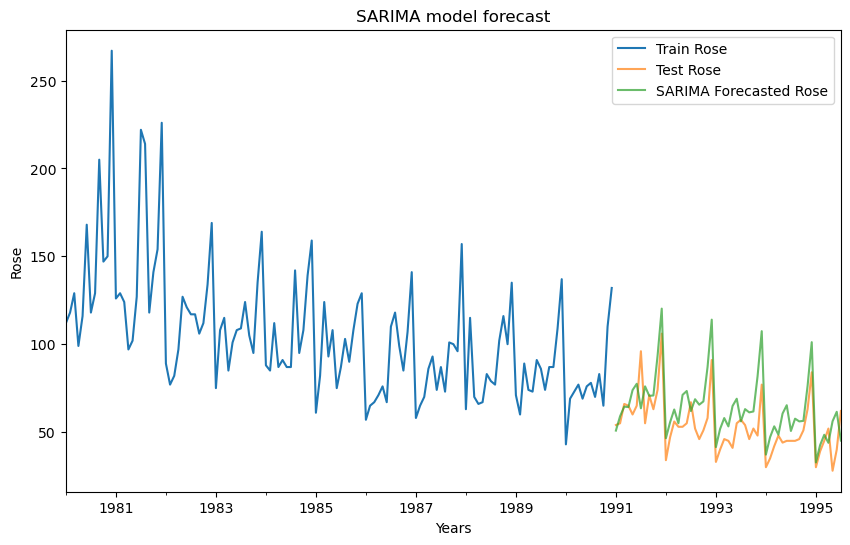

In [310]:
axis = train['Rose'].plot(label='Train Rose', figsize=(10, 6))
testCopy1['Rose'].plot(ax=axis, label='Test Rose', alpha=0.7)
testCopy1['SARIMA forecasted'].plot(ax=axis, label='SARIMA Forecasted Rose', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose')
plt.title('SARIMA model forecast')
plt.legend(loc='best')
plt.show()
plt.close()

In [497]:
## Building the most optimum model on the Full Data.

#* Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing

fullmodel1 = ExponentialSmoothing(Rose_data['Rose'],
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.2,
                                                                 smoothing_seasonal=0.1)

RMSE_fullmodel1 = metrics.mean_squared_error(Rose_data['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 17.02566042077981


In [498]:
# Getting the predictions for the same number of times stamps that are present in the test data
final_prediction = fullmodel1.forecast(steps=12)

In [499]:
final_prediction

1995-08-01    49.964554
1995-09-01    49.842233
1995-10-01    50.806489
1995-11-01    59.168191
1995-12-01    82.325490
1996-01-01    33.706342
1996-02-01    40.784007
1996-03-01    46.085277
1996-04-01    44.929079
1996-05-01    43.085914
1996-06-01    48.007422
1996-07-01    54.866211
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Rose wine sales forecast')

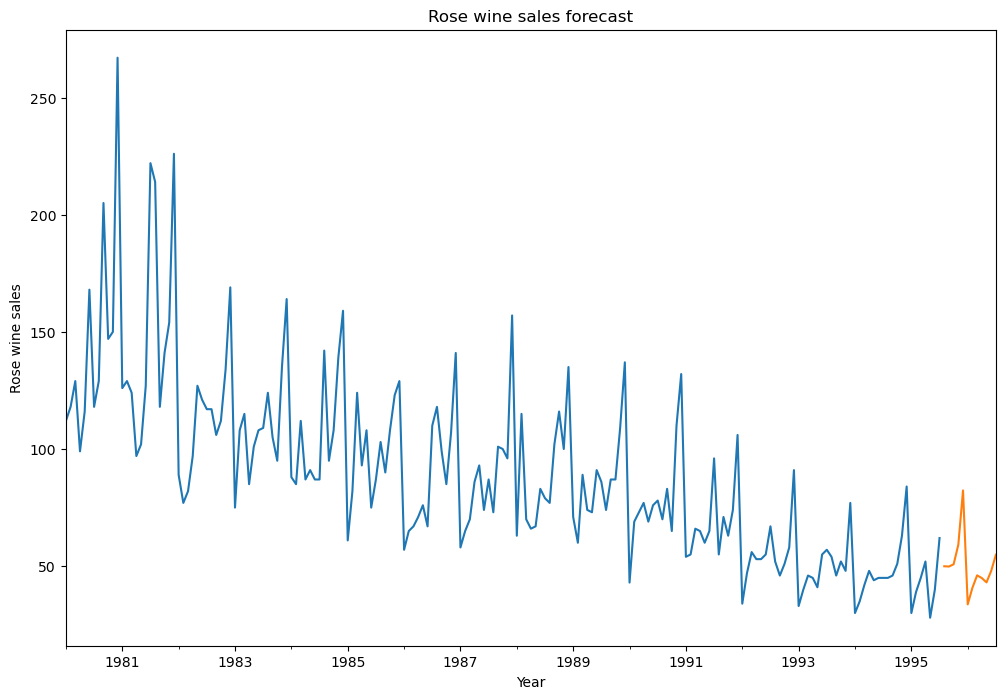

In [500]:
Rose_data['Rose'].plot()
final_prediction.plot();
plt.xlabel('Year')
plt.ylabel('Rose wine sales')
plt.title('Rose wine sales forecast')

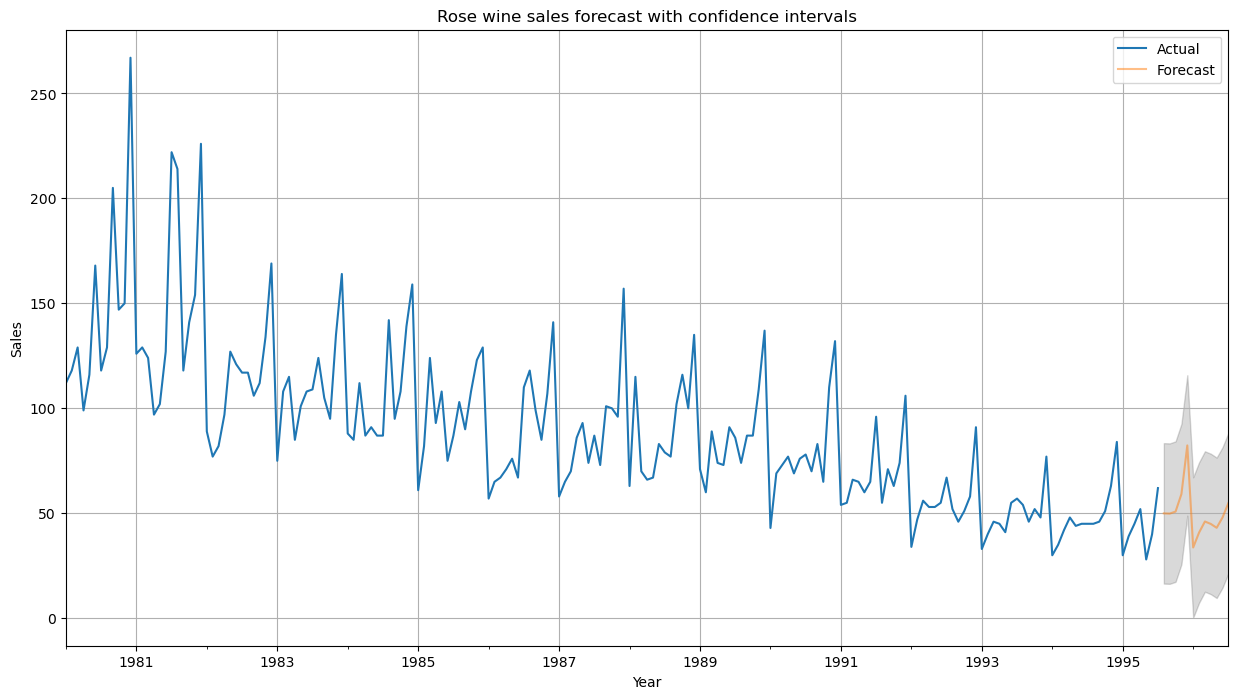

In [503]:
# plot the forecast along with the confidence band

axis = Rose_data['Rose'].plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.title('Rose wine sales forecast with confidence intervals')
plt.show()